In [1]:
# to display plots in notebook
%matplotlib inline
%config InlineBackend.figure_format = "retina"

from matplotlib import rcParams
rcParams["savefig.dpi"] = 300  # high res plots
rcParams["font.size"] = 12

import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import xarray as xr
import numpy.ma as ma
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [3]:
# look through all NOAA insitu measurements,
# find corresponding model results
# store the values in the same file

In [4]:
year = 2018

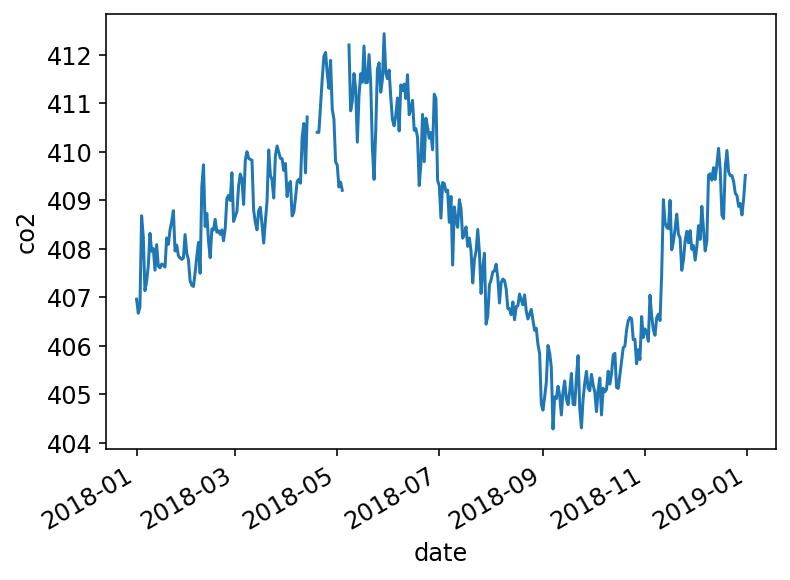

In [5]:
file_dir = '/geos/u73/msadiq/co2_data/extract/'
filename = '2018_daily_MLO.nc'
ds_obs = xr.open_dataset(file_dir + filename)
ds_obs['co2'].plot()

In [6]:
lon = ds_obs.attrs['site_longitude']
lat = ds_obs.attrs['site_latitude']
[lon,lat]

[-155.5763, 19.5362]

In [7]:
# model directory and file
mod_dir = '/geos/u73/msadiq/GEOS-Chem/rundirs/ensemble_runs/CO2-2018/OutputDir/'
mod_file = 'SpeciesConc.2018.nc'
ds_mod = xr.open_dataset(mod_dir + mod_file)
dr = ds_mod['SpeciesConc_CO2']

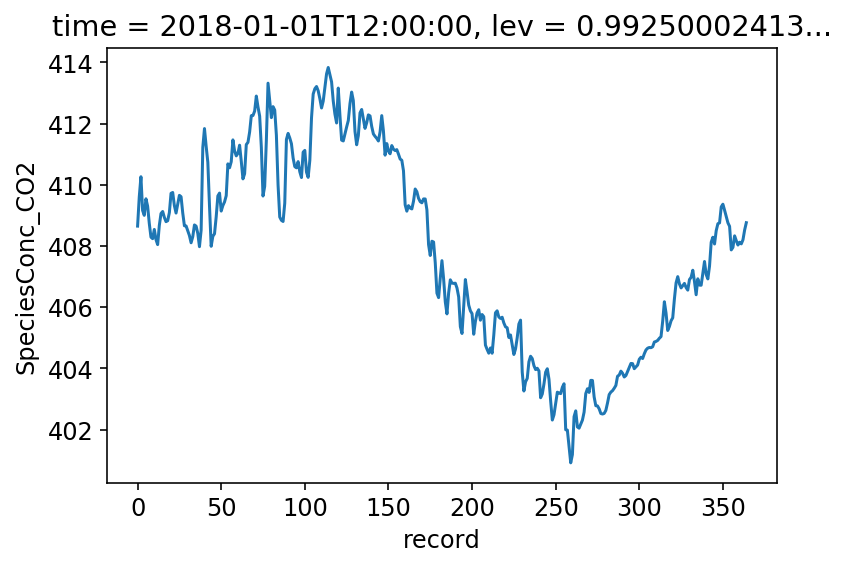

In [8]:
daily_co2_mod = dr[:,0,0,:,:]
ts_model = daily_co2_mod.sel(lon = lon, lat = lat, method='nearest')*1e6
ts_model.plot()

In [9]:
ds_obs['obs'] = ds_obs['co2']
ds_obs['mod'] = ds_obs['co2']
ds_obs['mod'].values = ts_model.values

obs_series = ds_obs['obs'].values
model_series = ds_obs['mod'].values
R = ma.corrcoef(ma.masked_invalid(obs_series), ma.masked_invalid(model_series))

format_R = float("{0:.2f}".format(R[0,1]))
format_R

0.85

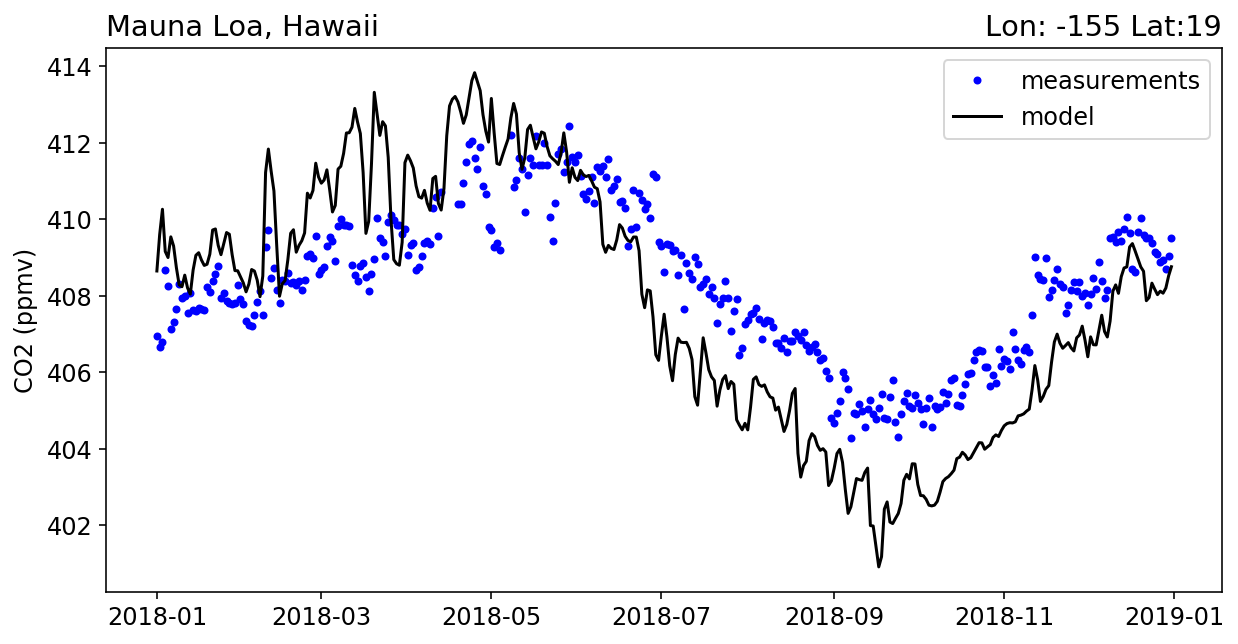

In [10]:
fig = plt.figure(figsize=[10,5])
plt.plot(ds_obs.date, ds_obs['obs'], 'b.', label = 'measurements')
plt.plot(ds_obs.date, ds_obs['mod'], 'black', label = 'model')
plt.legend()
plt.title(ds_obs.attrs['site_name'], loc='left') 
plt.title('Lon: ' + str(int(lon)) + ' Lat:' + str(int(lat)), loc='right')
plt.ylabel('CO2 (ppmv)')

fig.savefig(file_dir + '/plots/' + str(year) + '_' + ds_obs.attrs['site_code'] + '_mod_vs_obs.png', dpi=300)

In [11]:
# do the above calculations for all of sites

In [12]:
file_dir = '/geos/u73/msadiq/co2_data/extract/'
file1 = open(file_dir + 'filenames_2018', 'r')
lines = file1.readlines()

-0.13
0.97
0.71
0.86
0.17
0.94
0.58
0.94
0.87
0.79
0.78
0.5
0.31
0.45
0.51
0.86
0.68
0.81
0.85
0.38
0.51
0.84
-0.3
0.93
0.0
0.68
0.59
0.73
0.92
0.87
0.69
0.68
0.72
0.87
0.58
0.73
0.86
0.47
0.61
0.59
0.9
0.7
0.29
0.85
0.93
0.89
0.82
0.75
0.68
0.93
0.07
0.58
0.72
0.86
0.42
0.46
0.86
0.69
0.91
-0.38
0.72
0.93
0.9
0.82
0.55
0.83
0.91
0.45
0.81
0.97


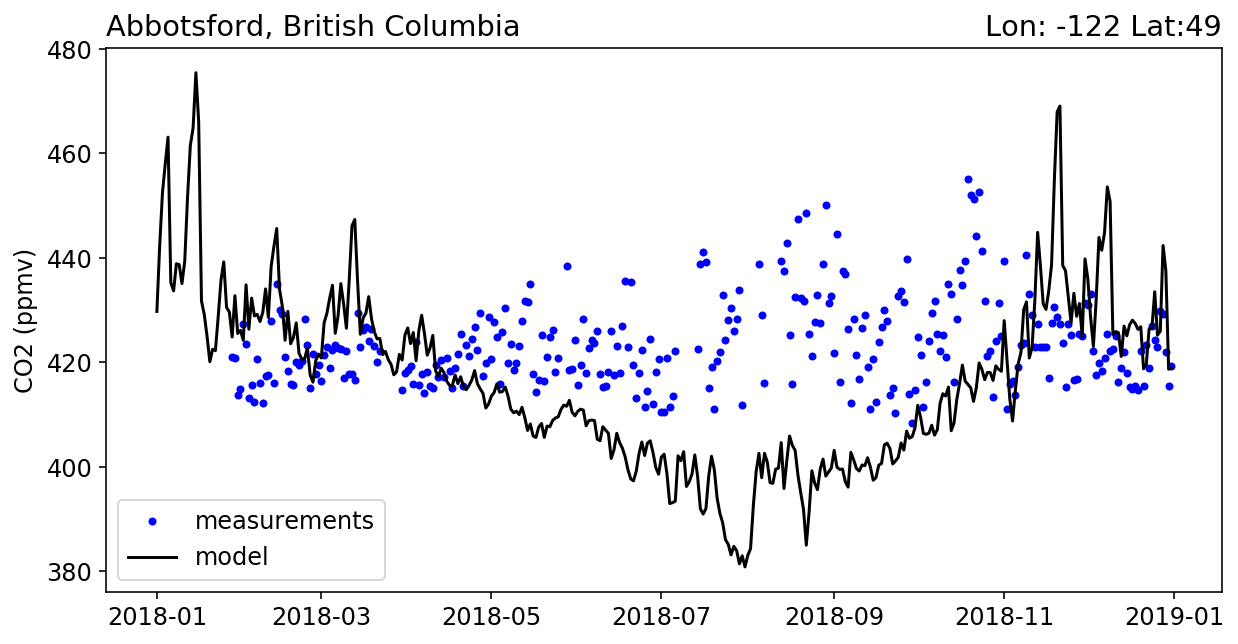

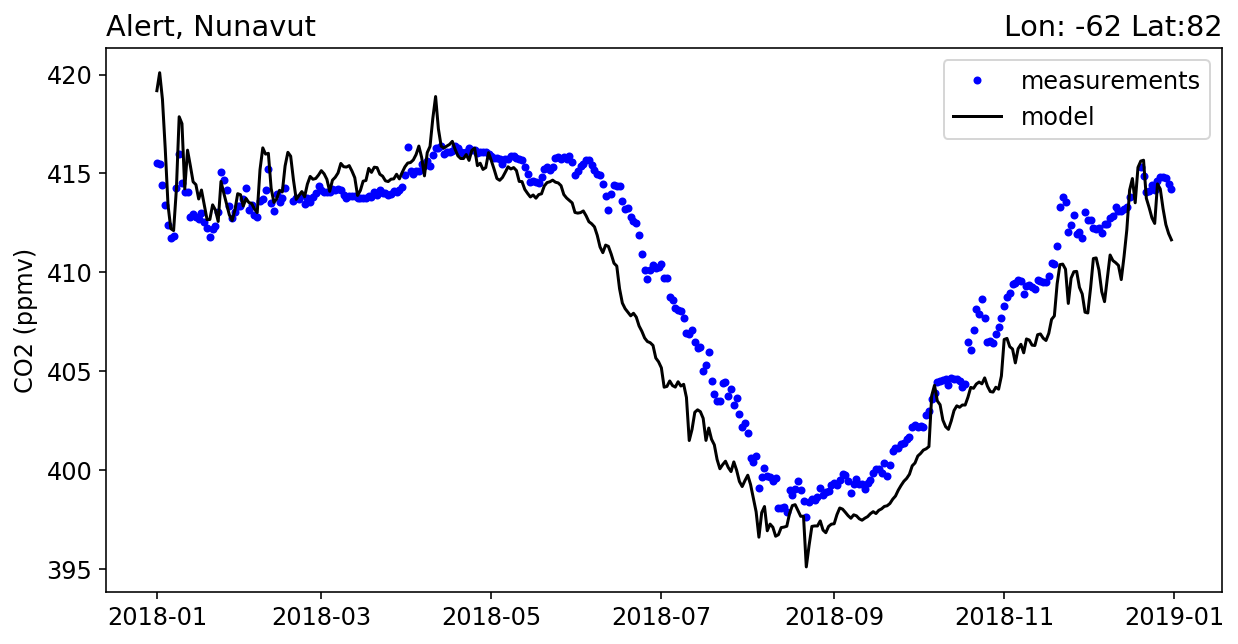

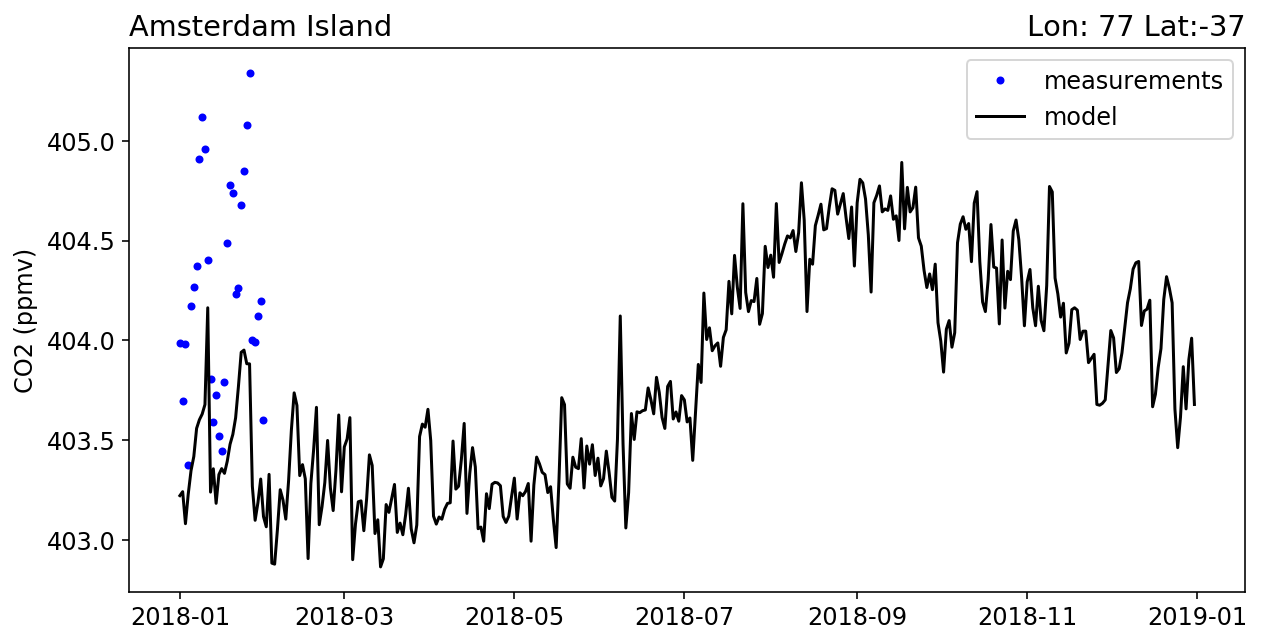

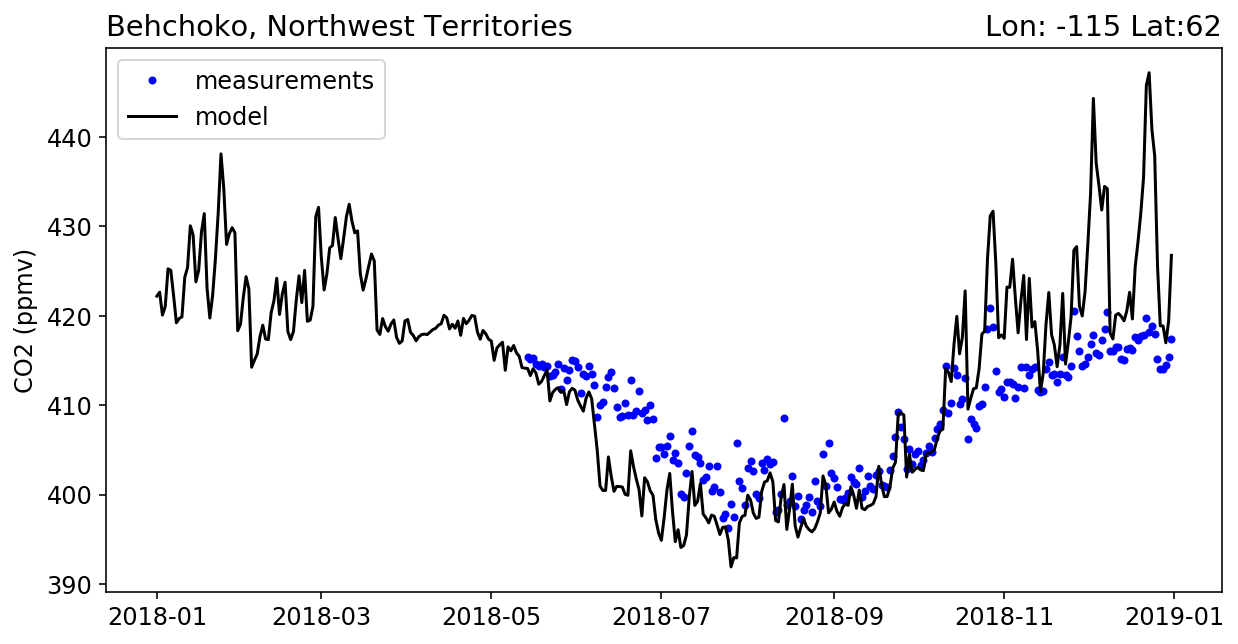

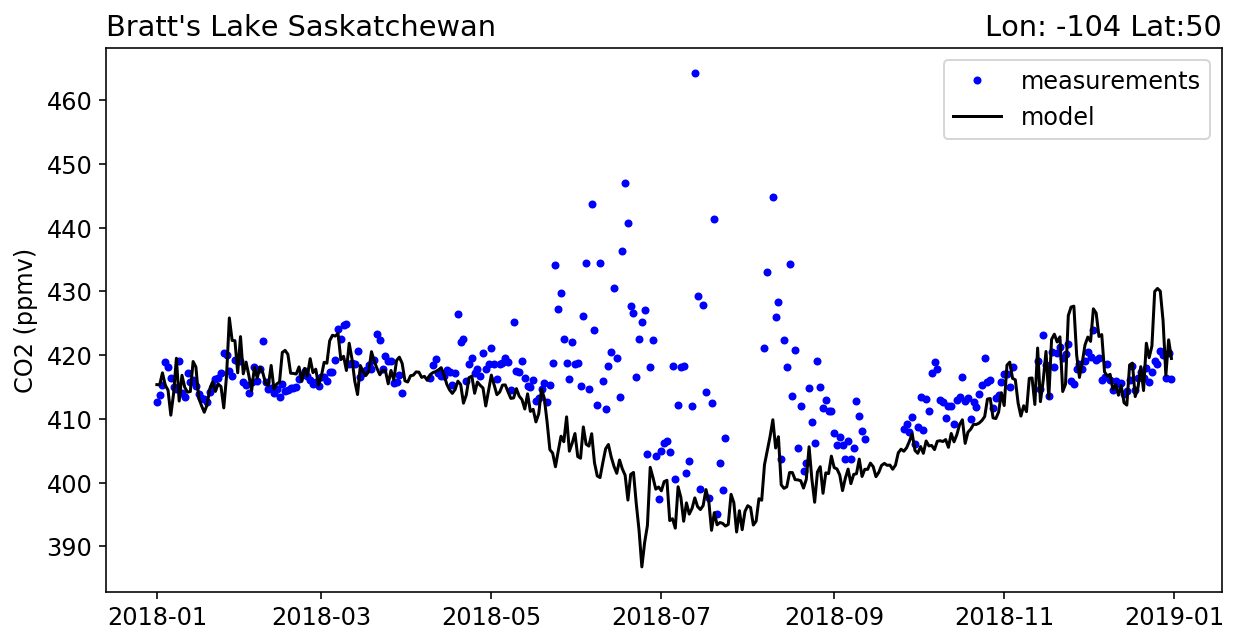

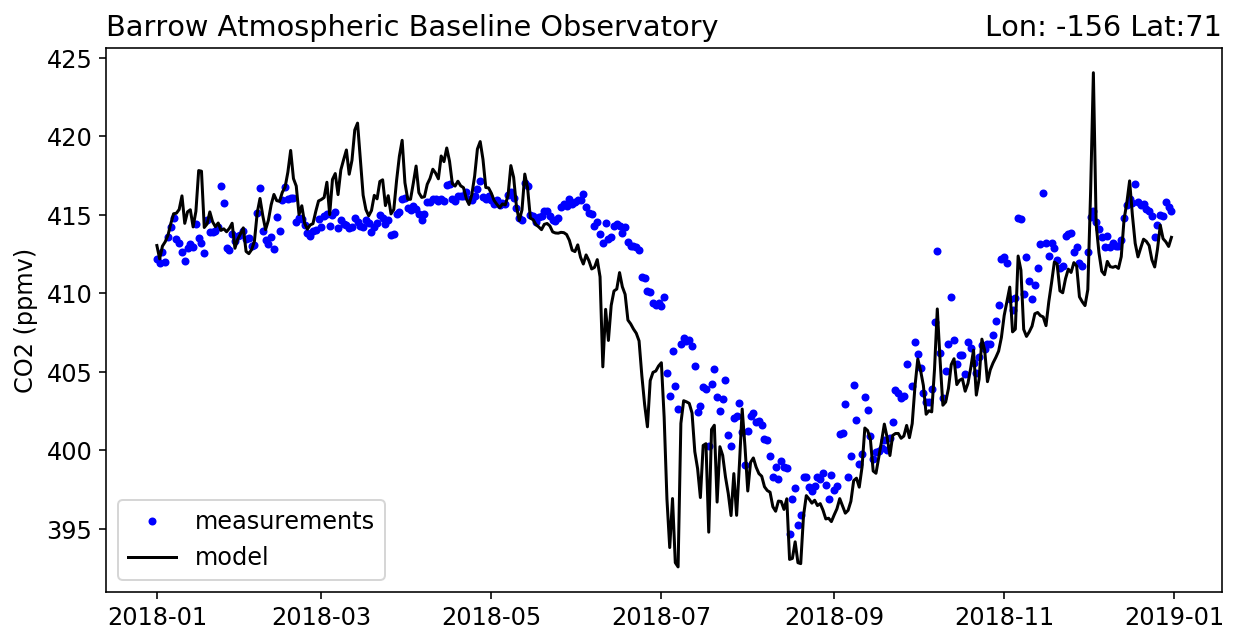

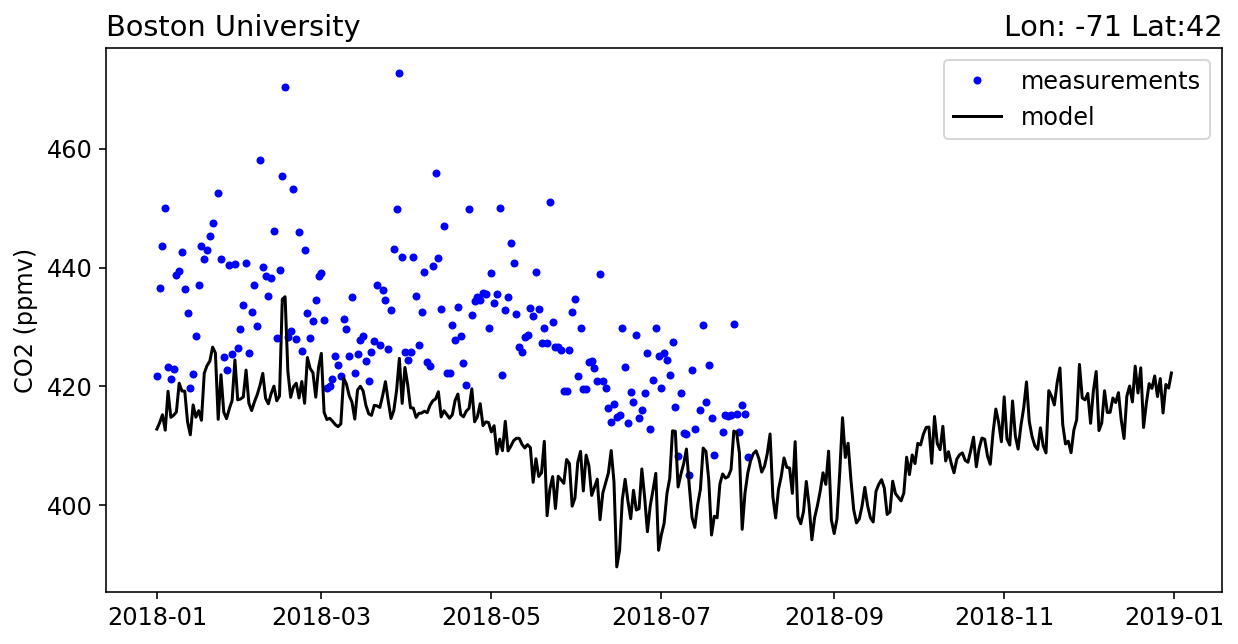

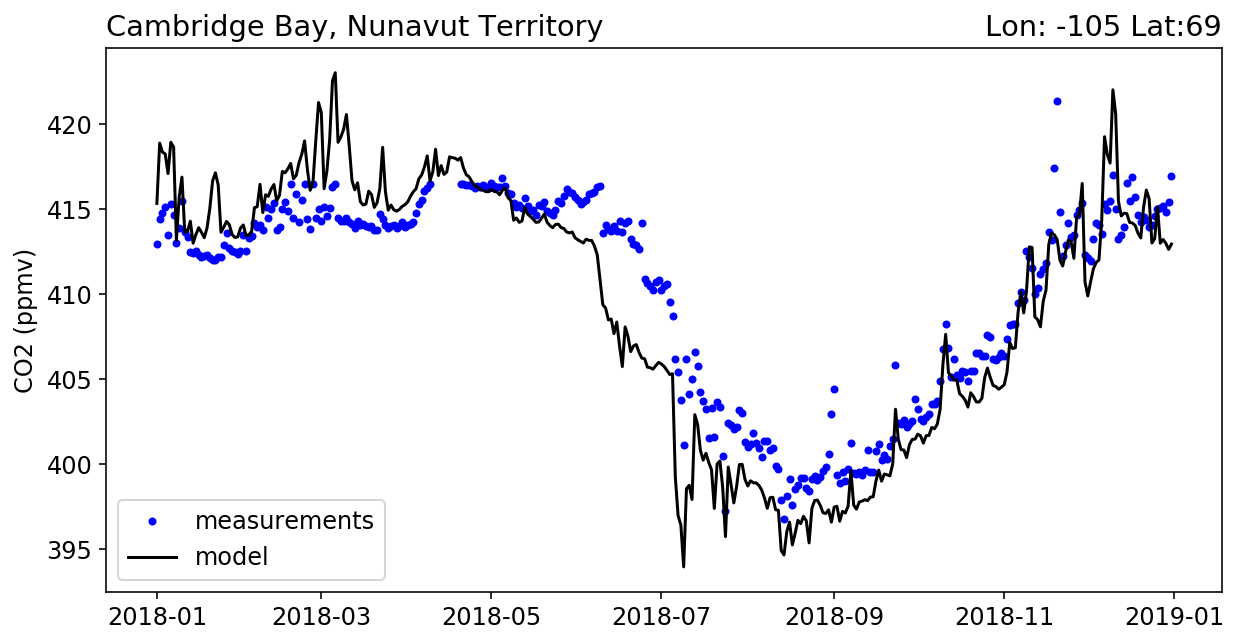

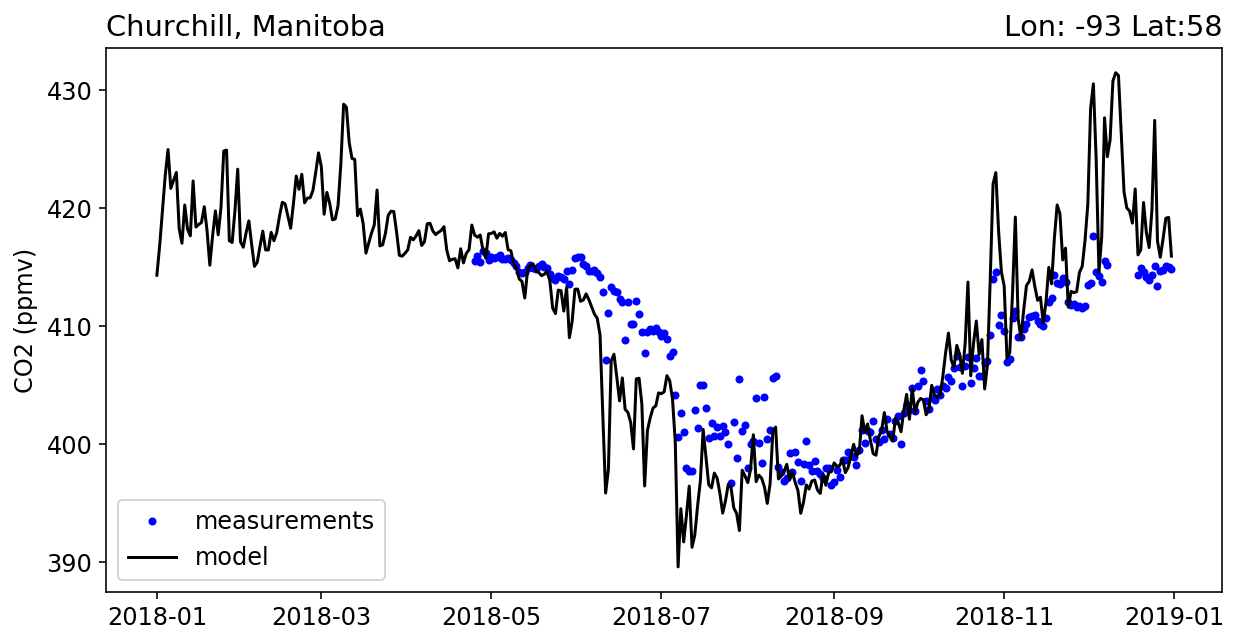

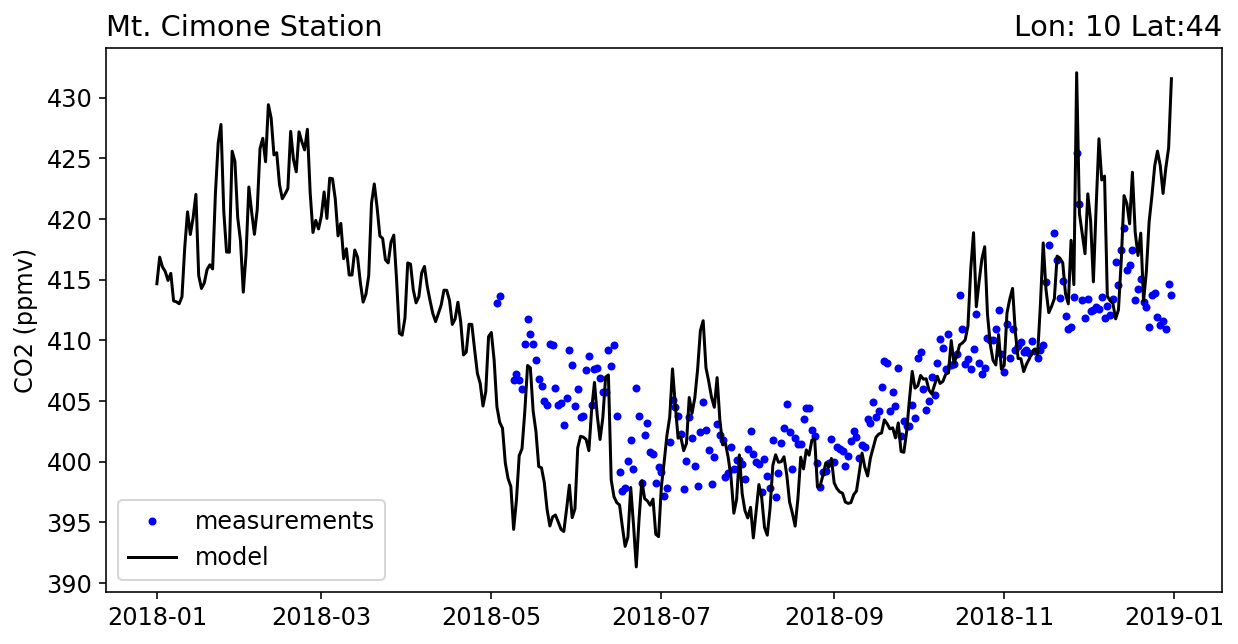

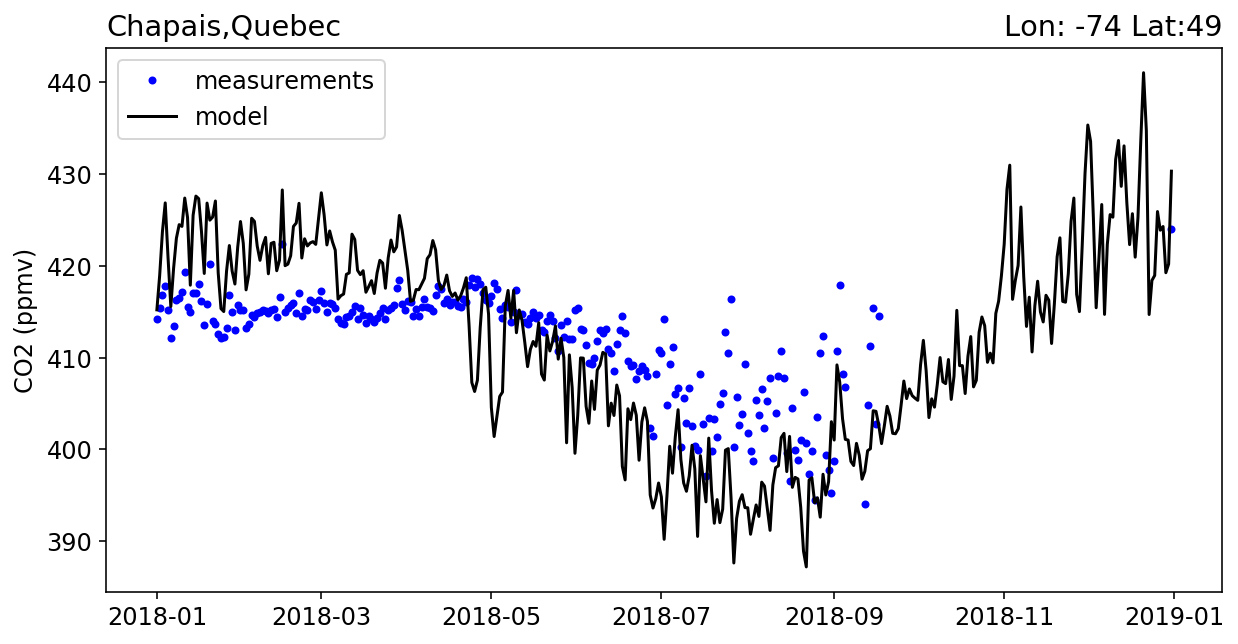

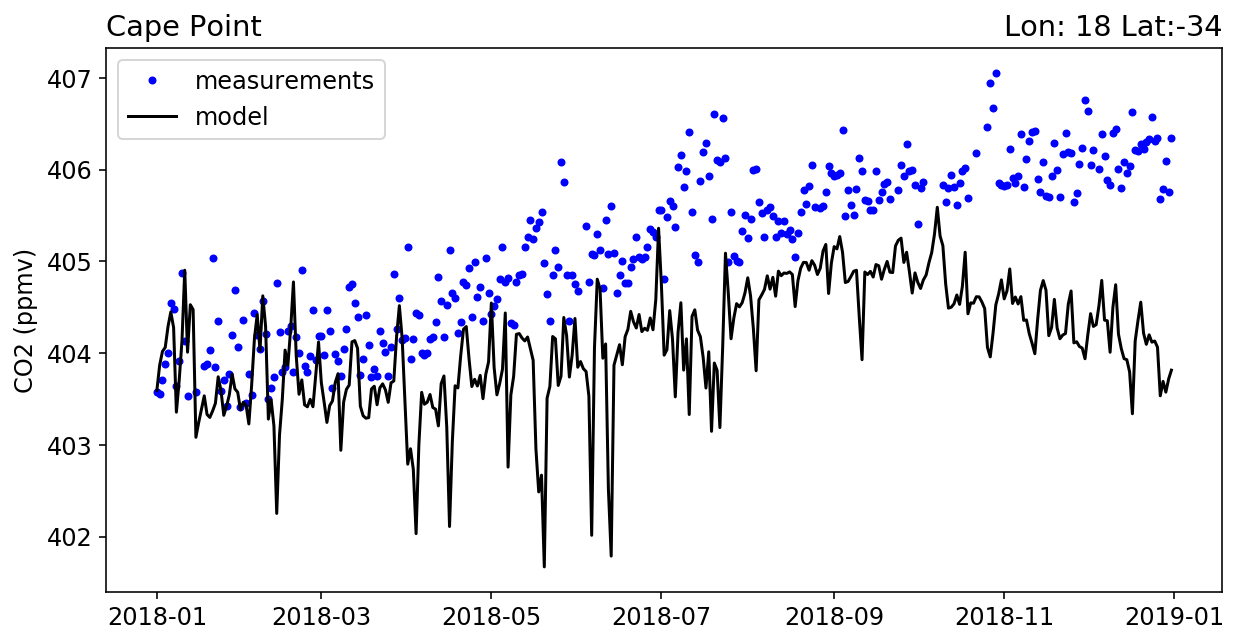

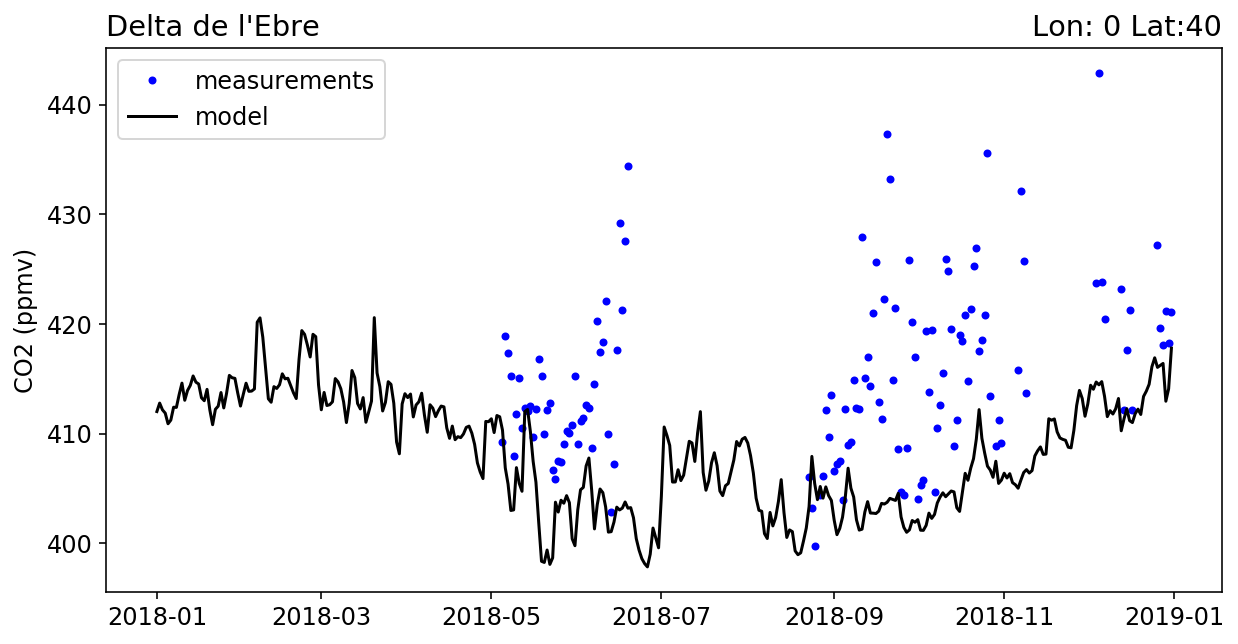

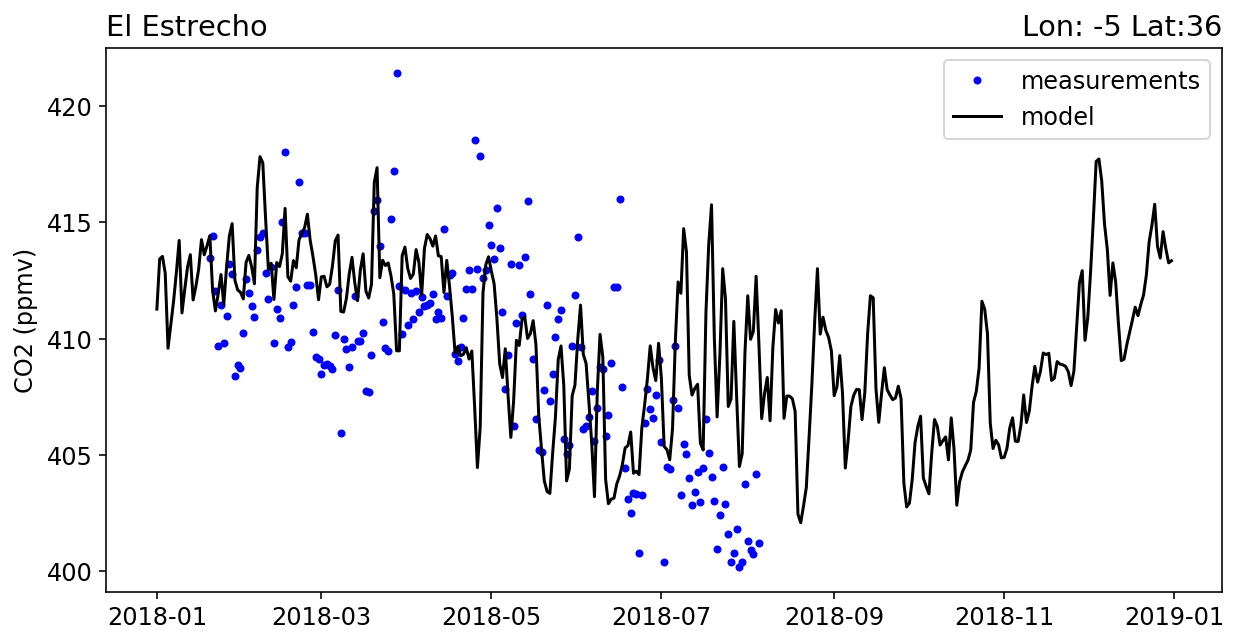

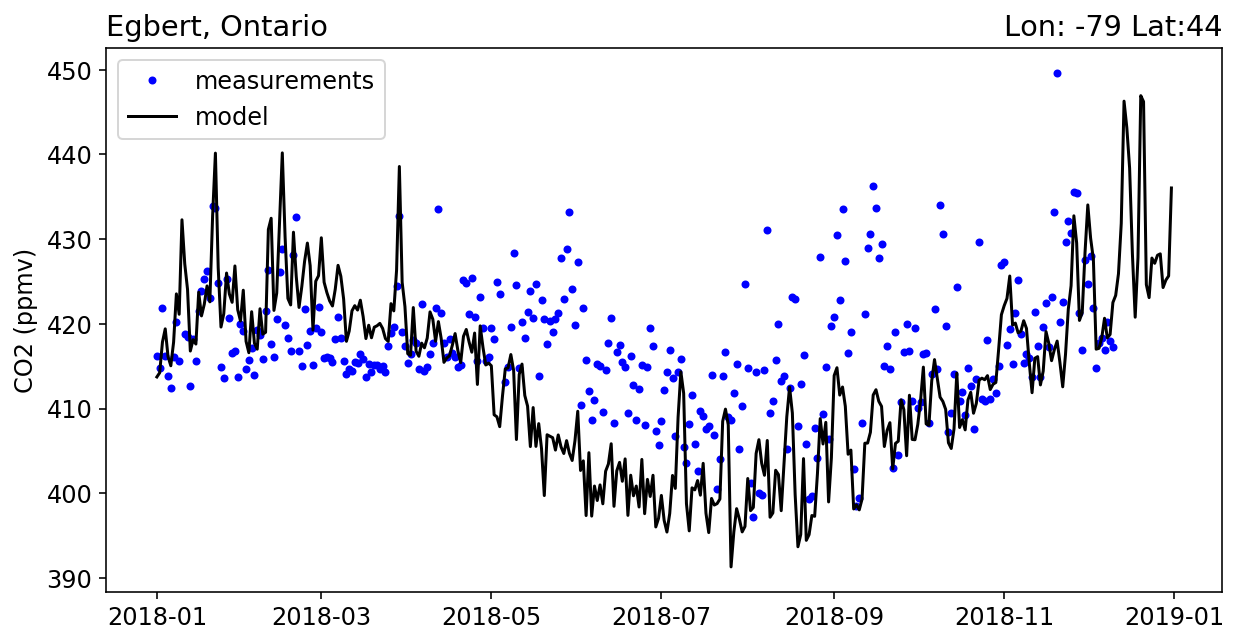

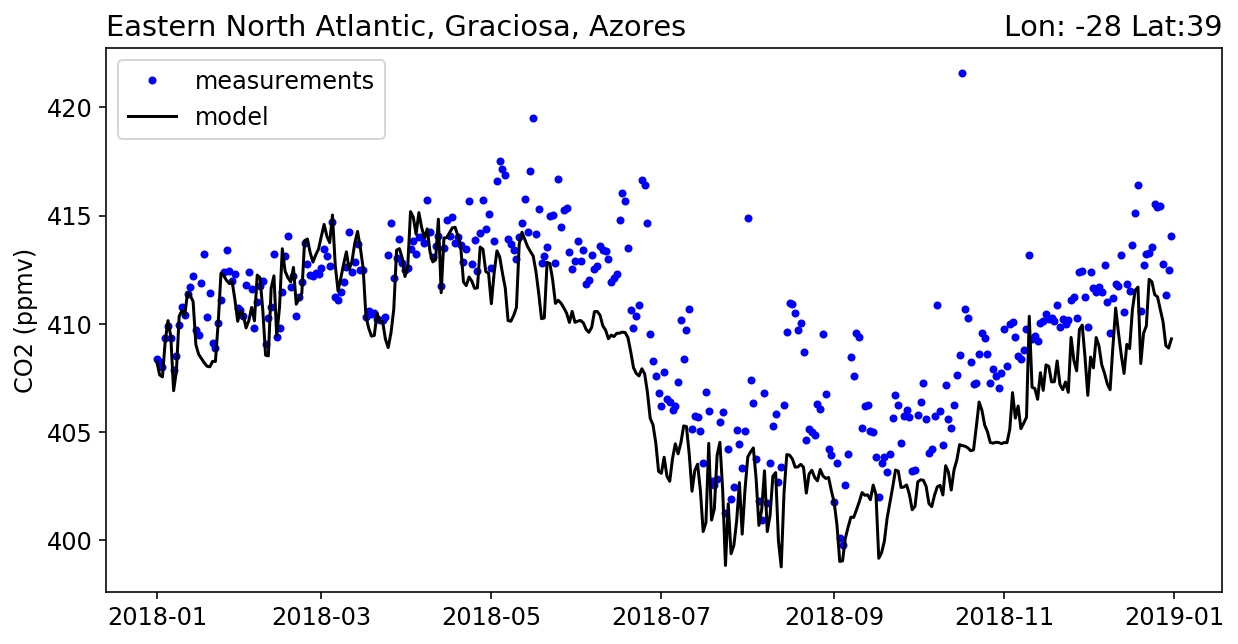

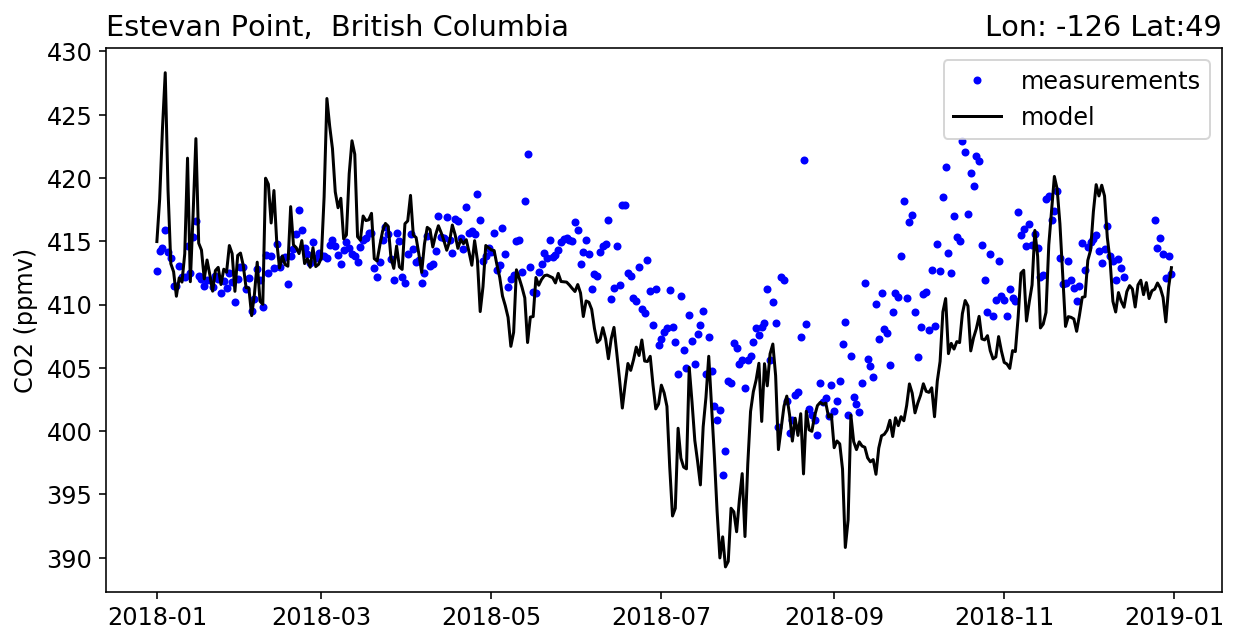

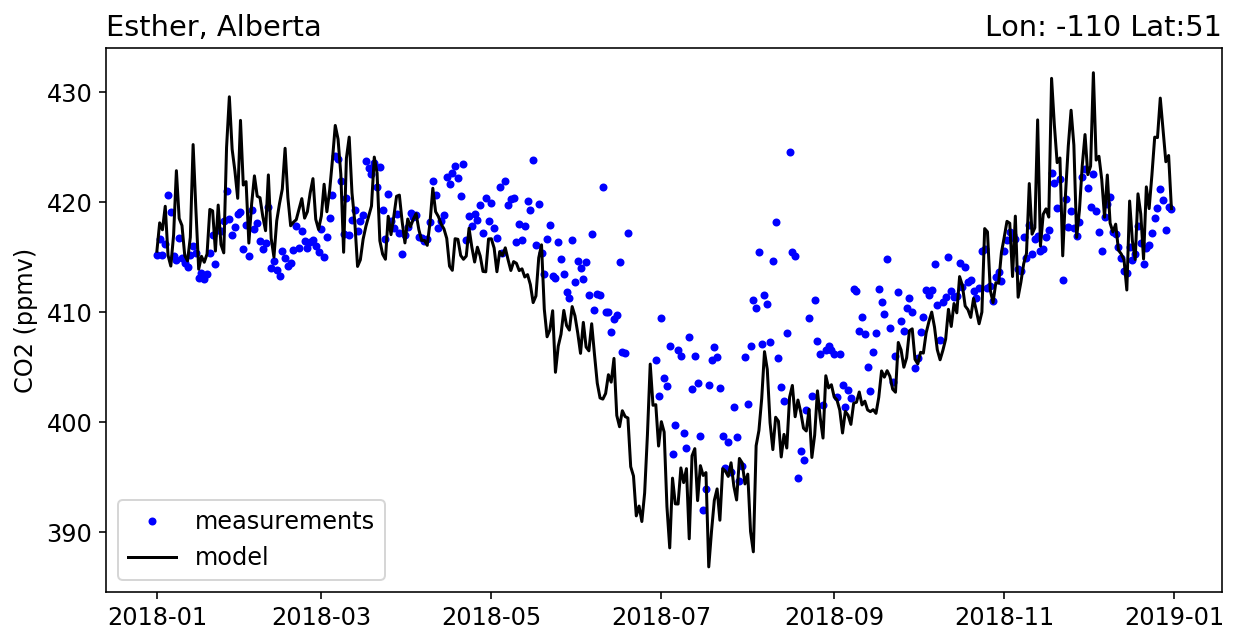

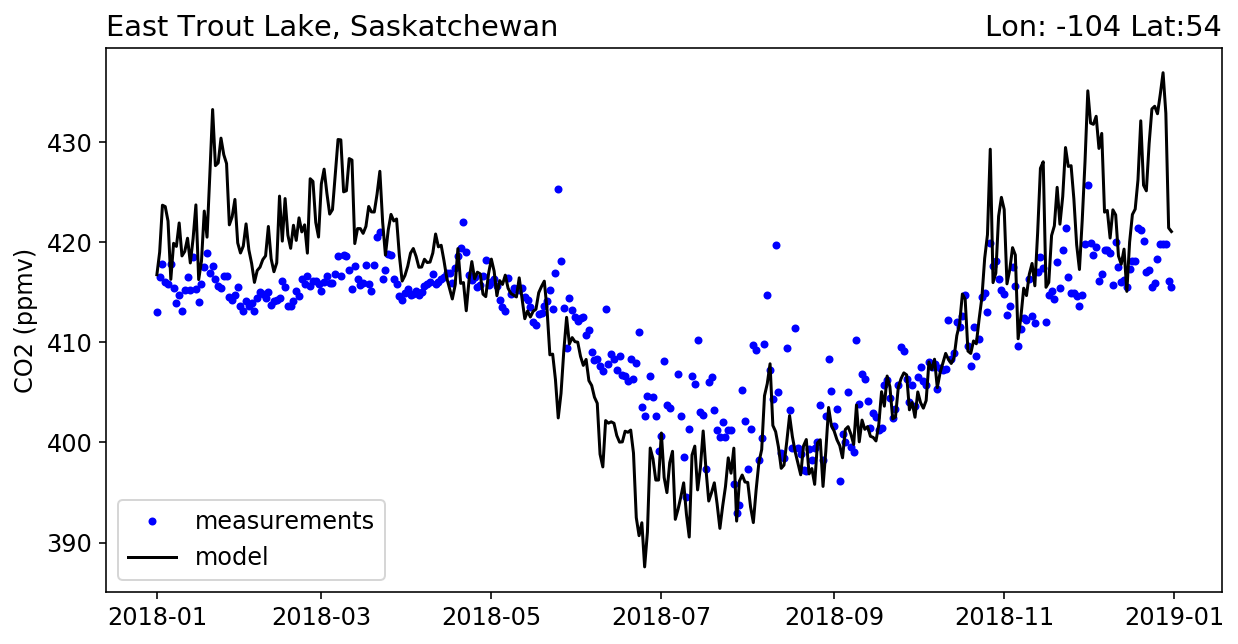

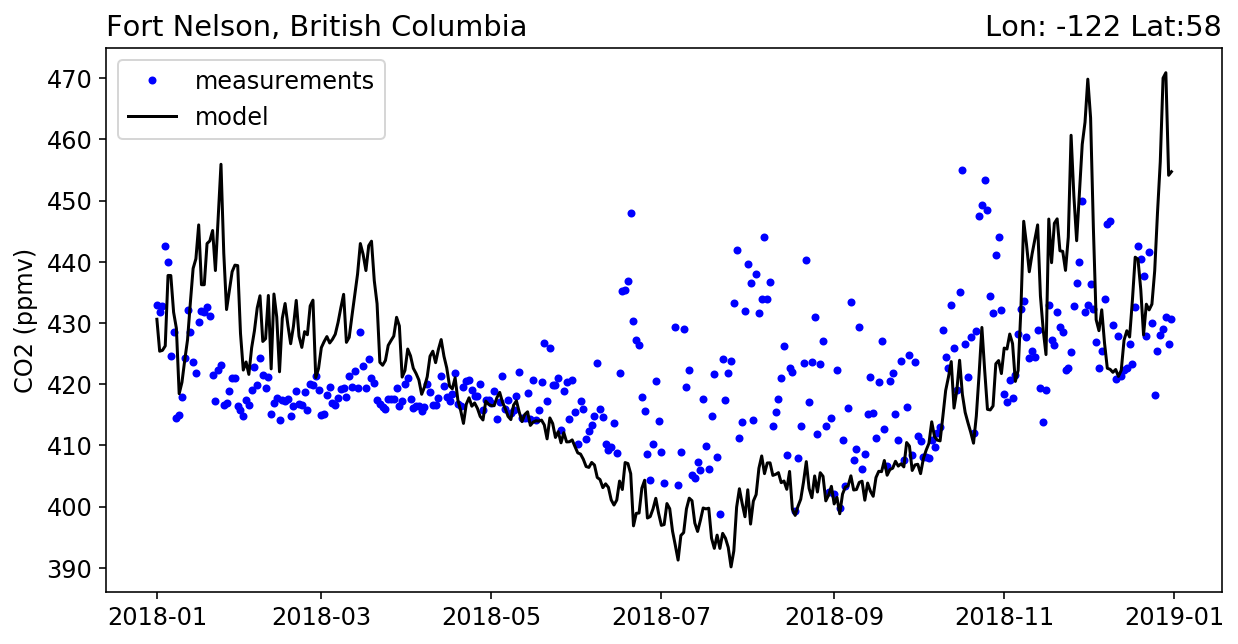

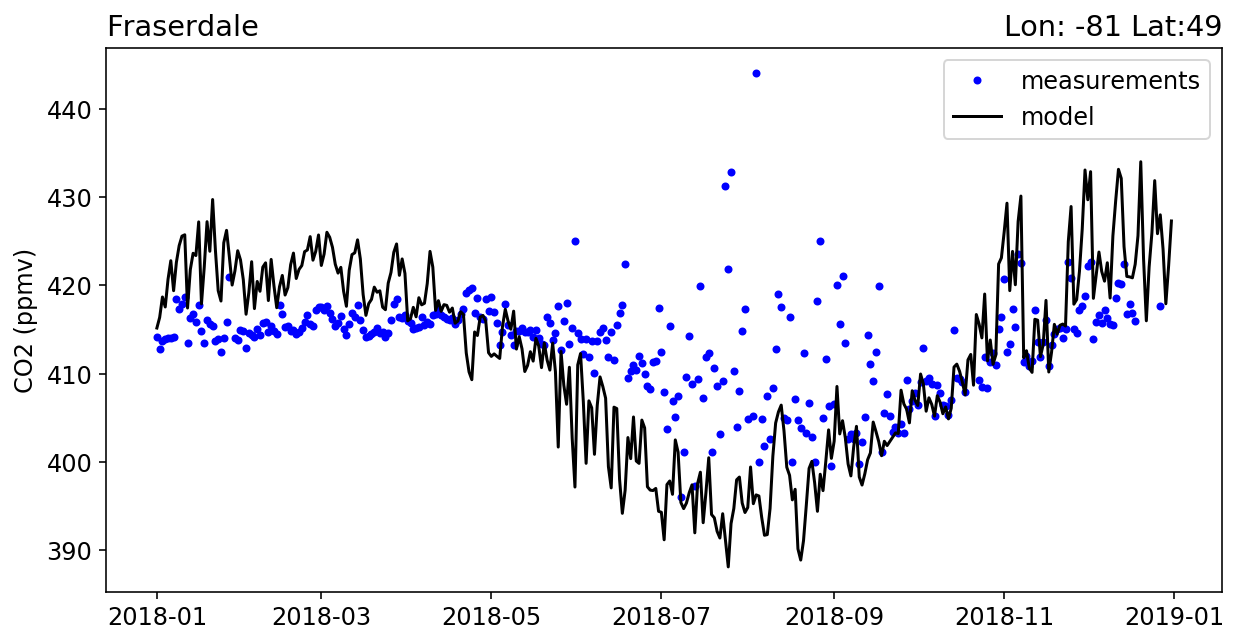

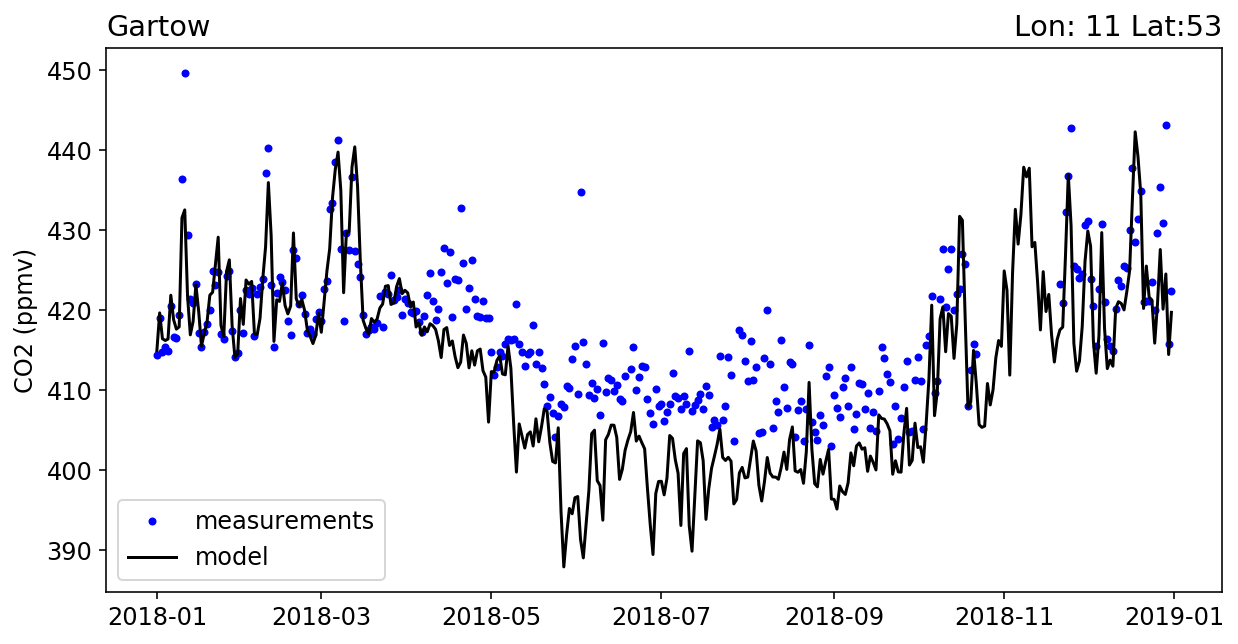

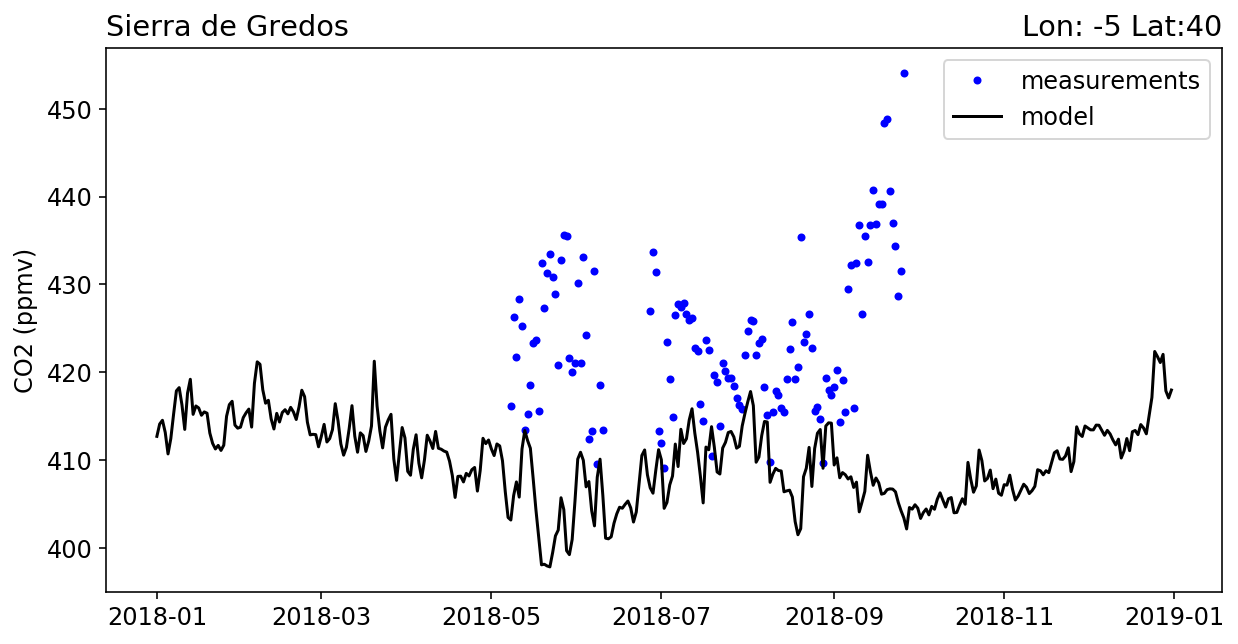

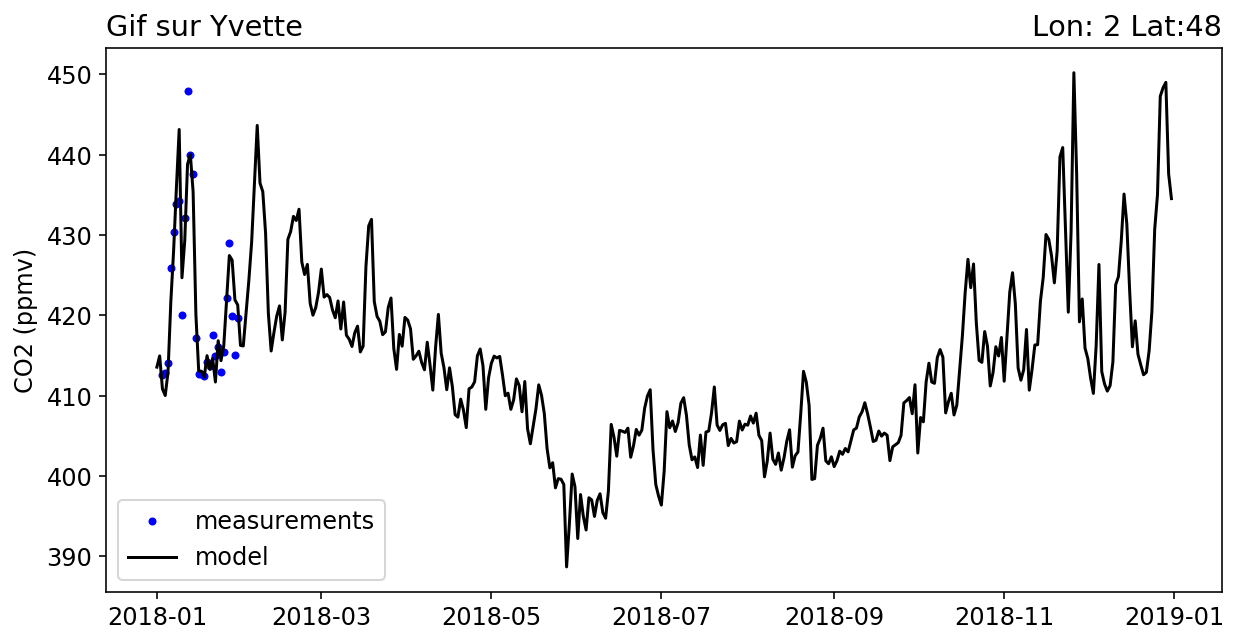

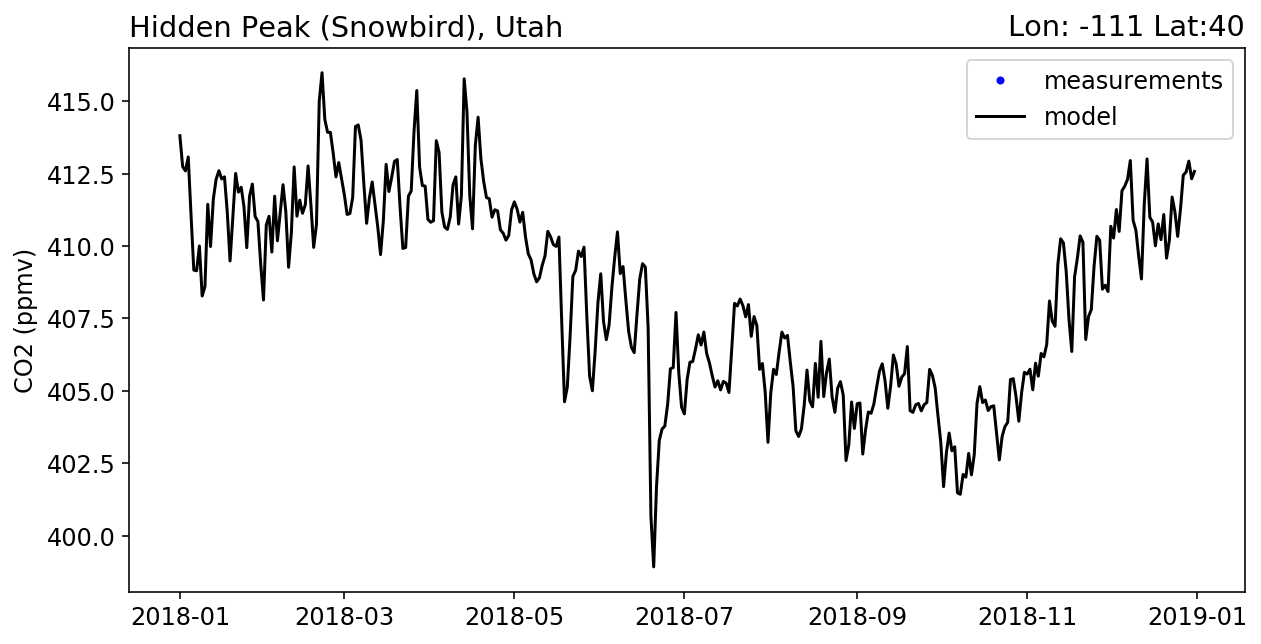

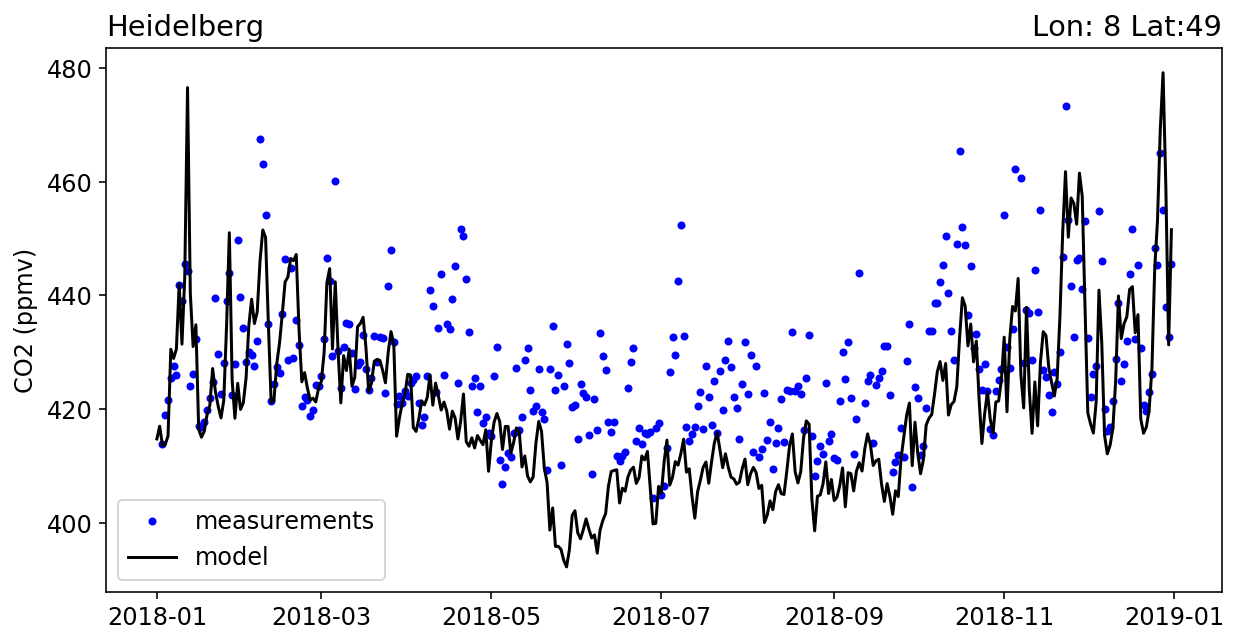

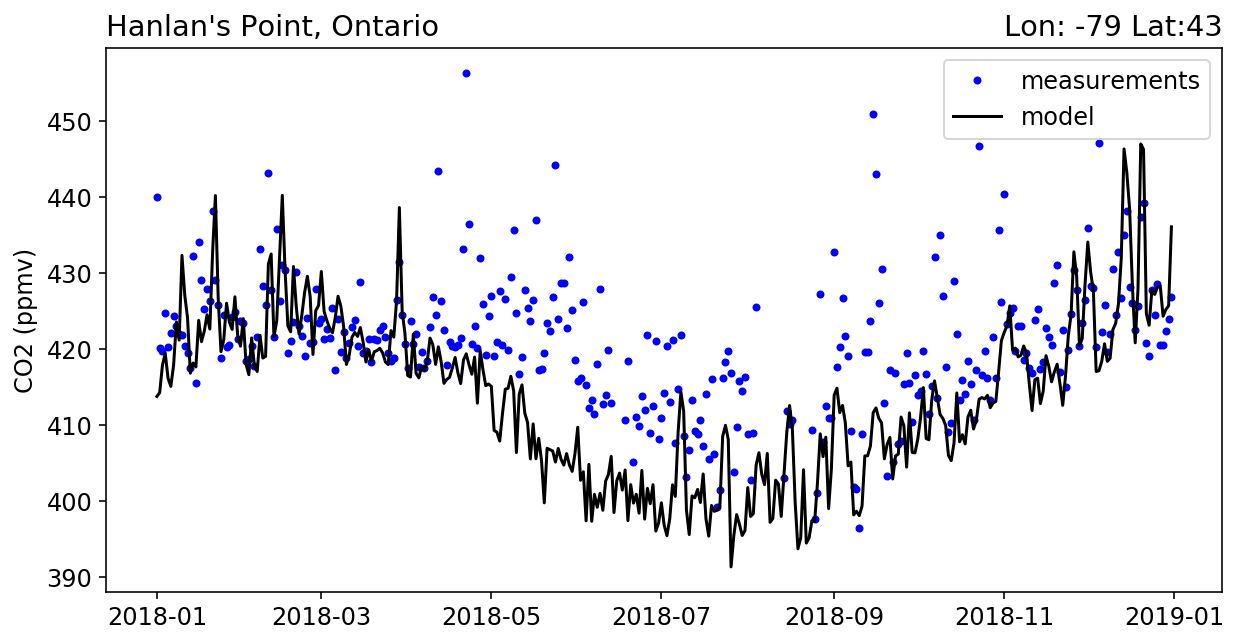

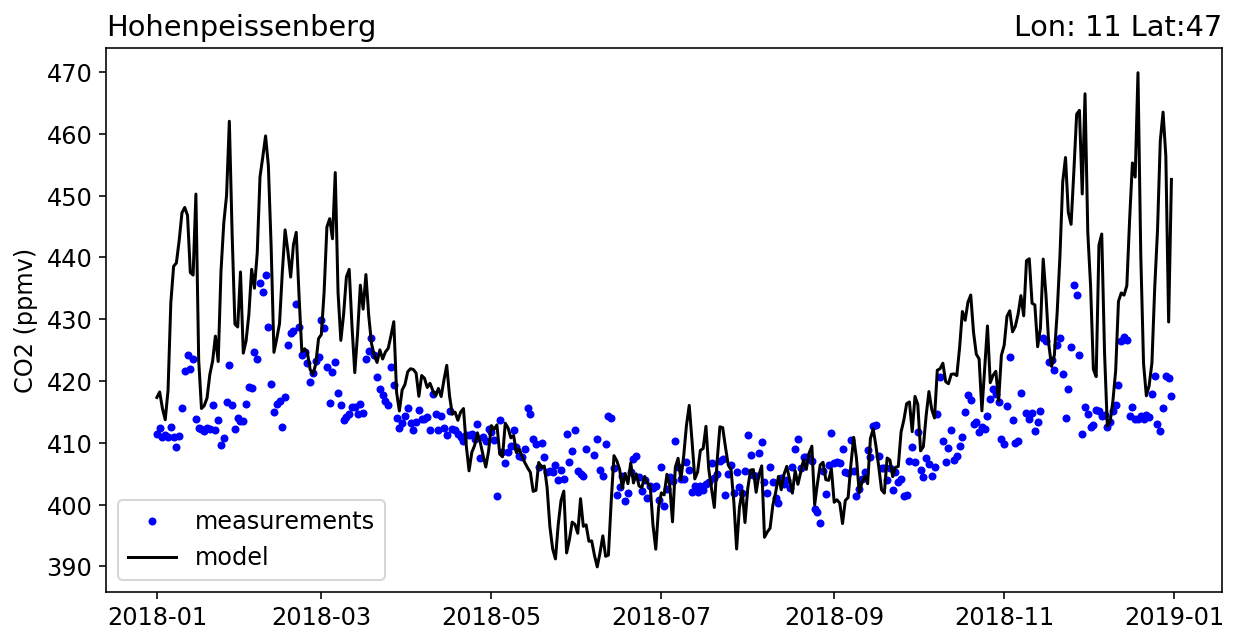

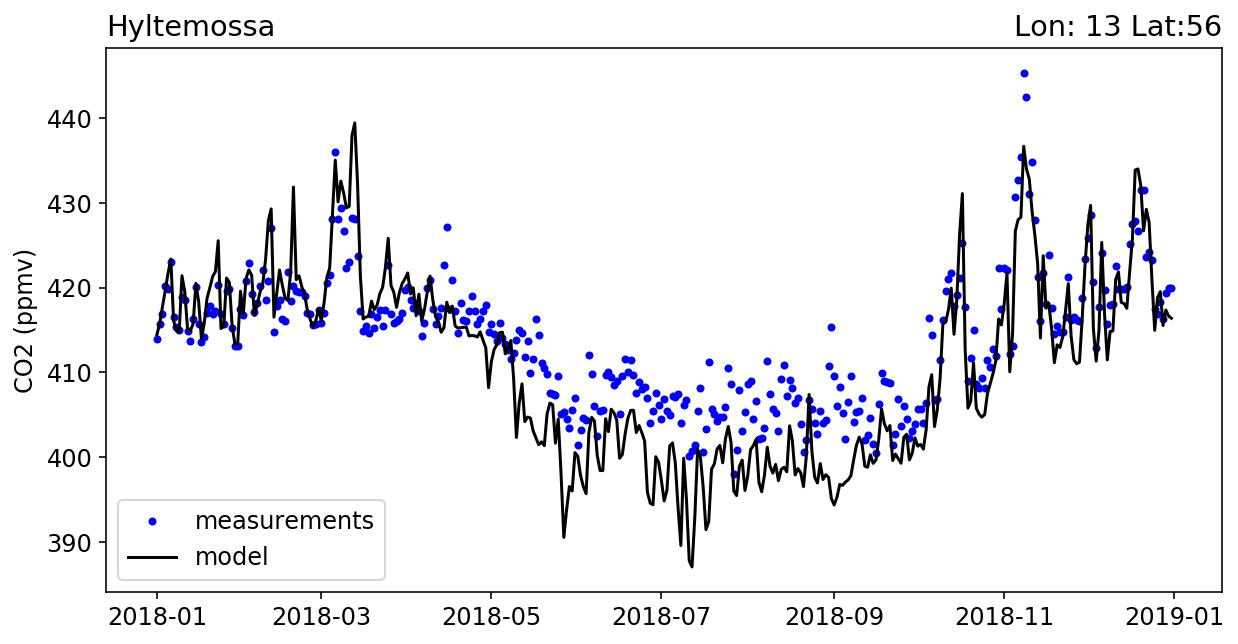

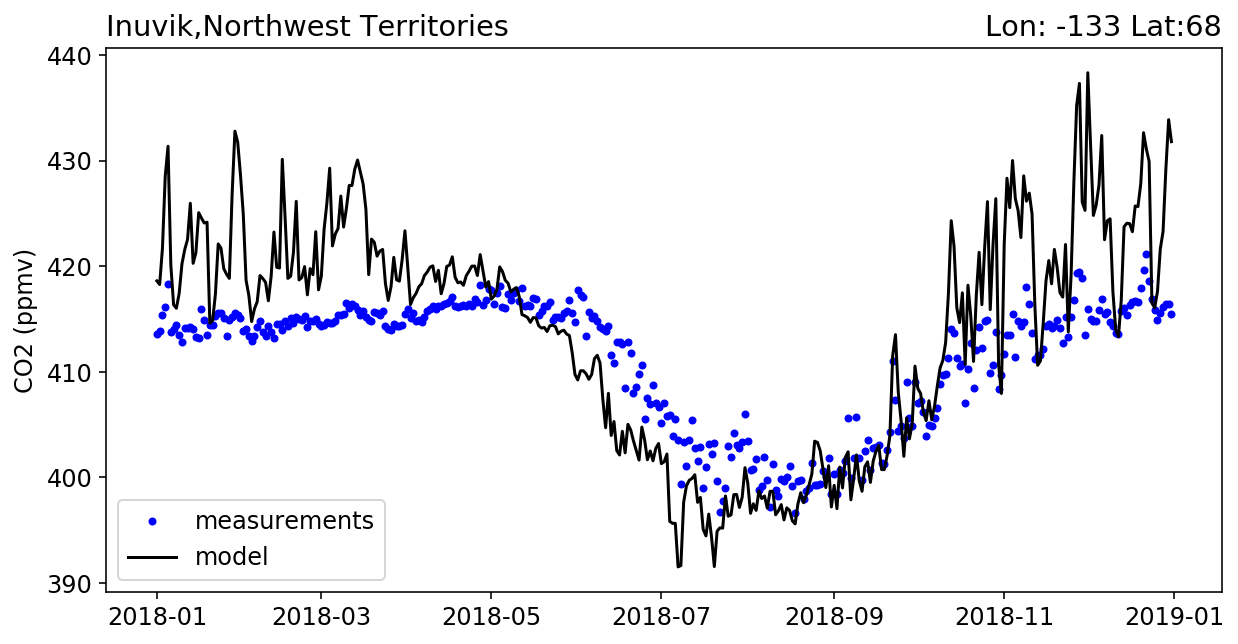

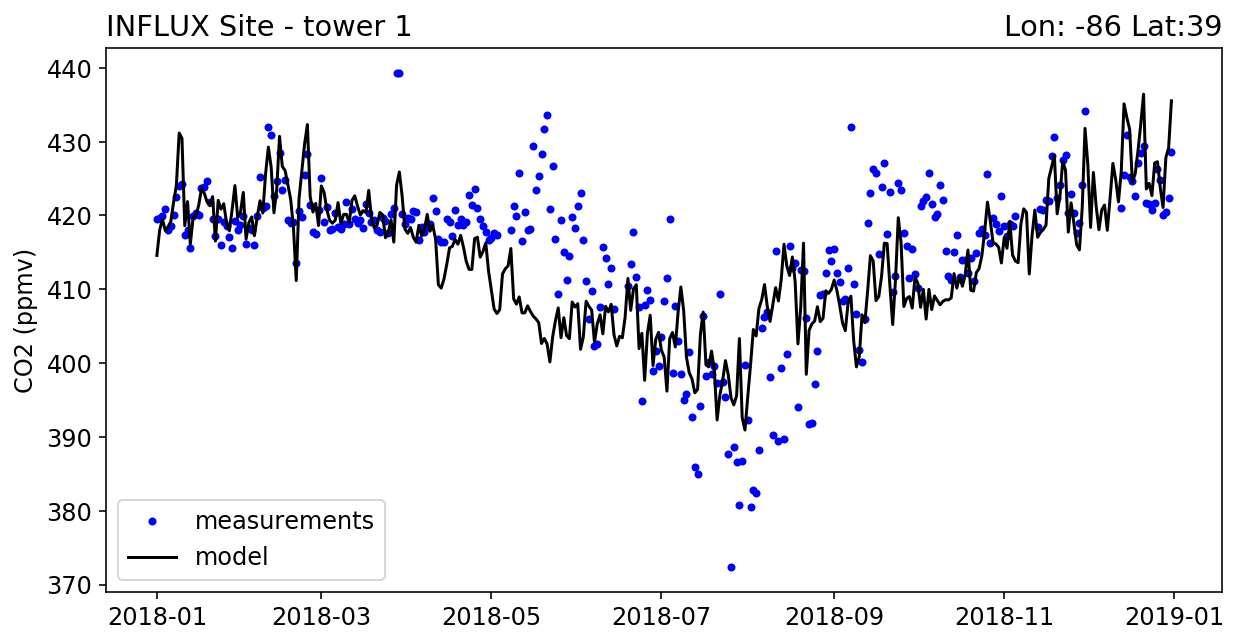

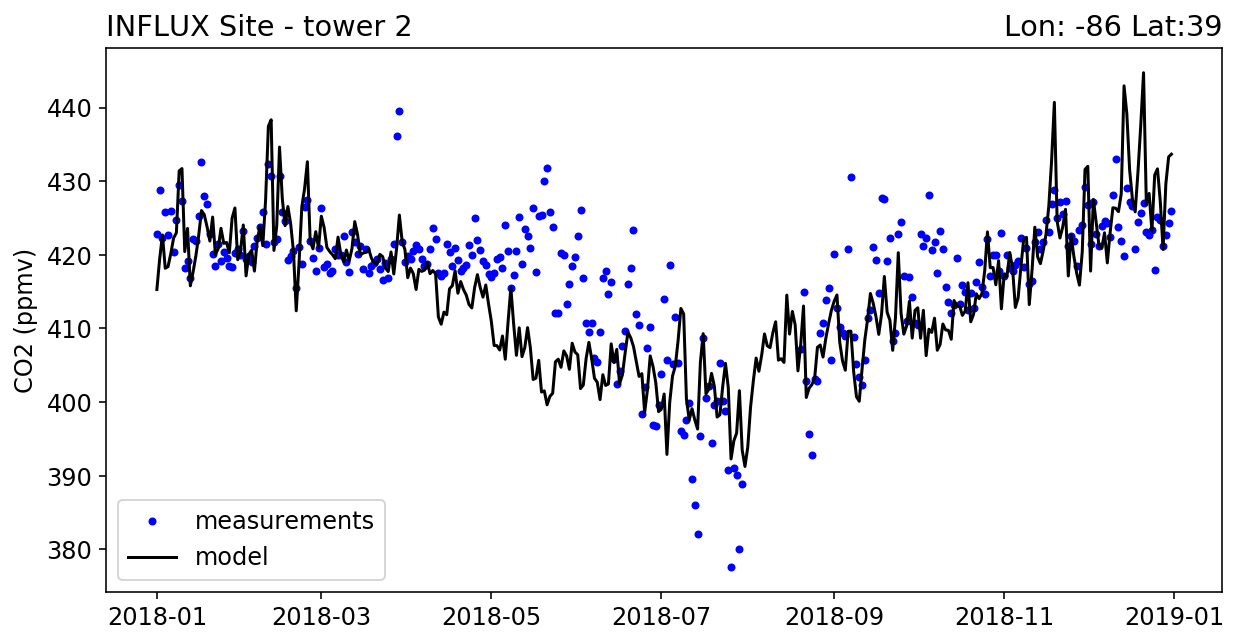

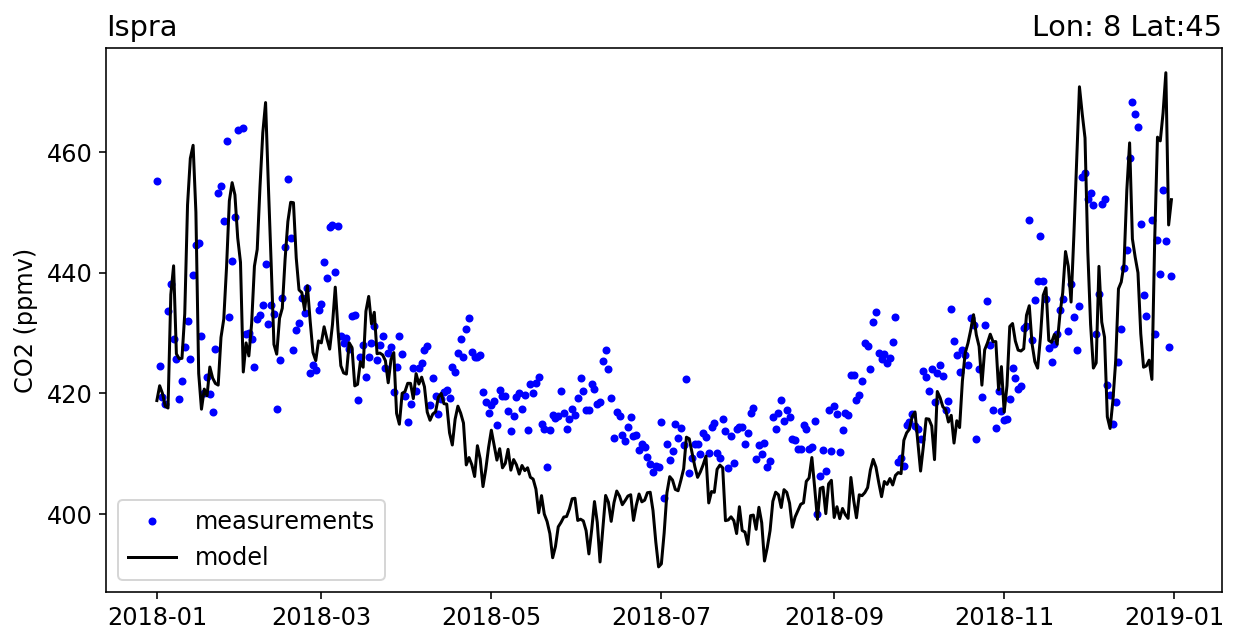

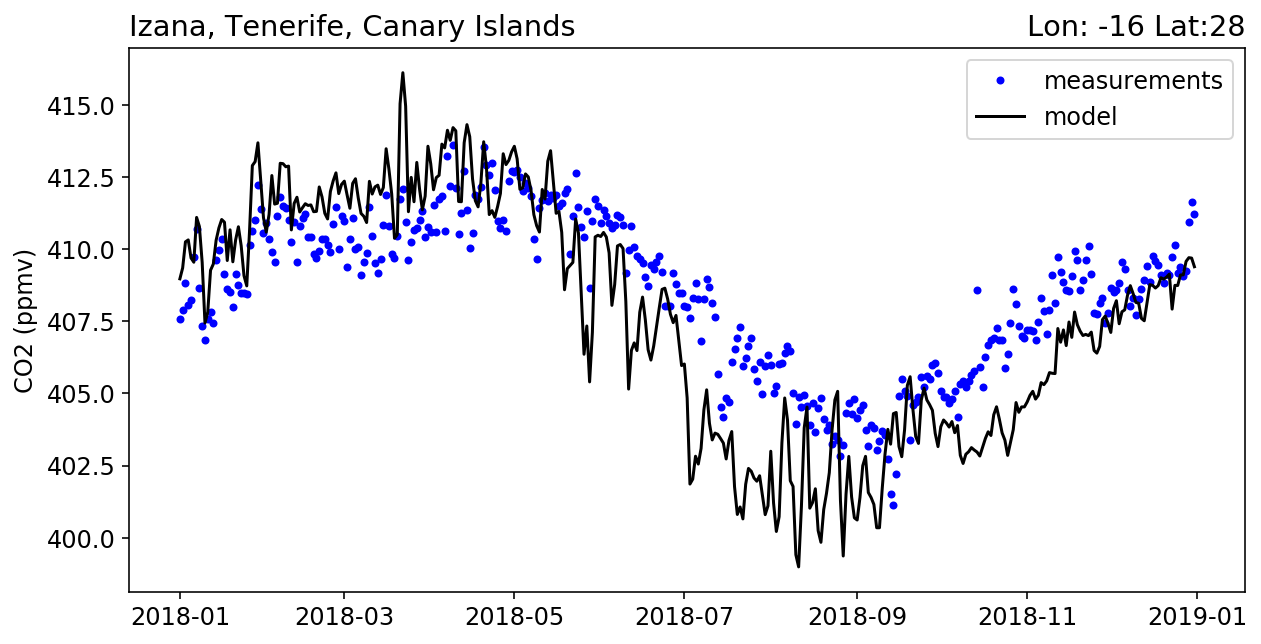

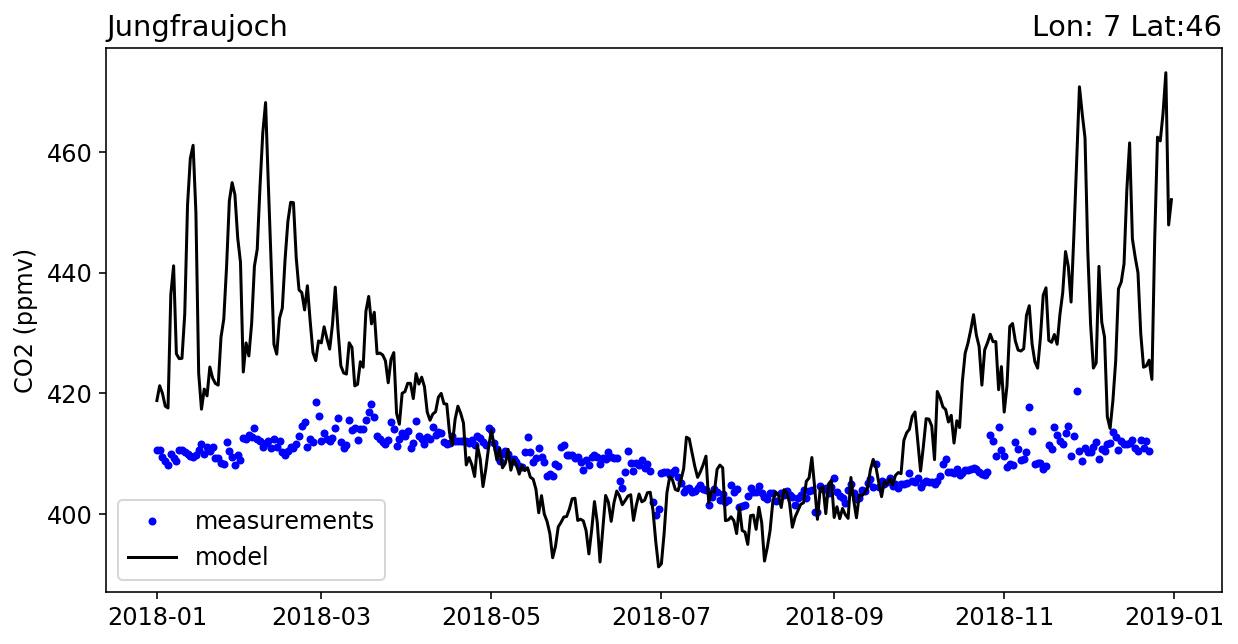

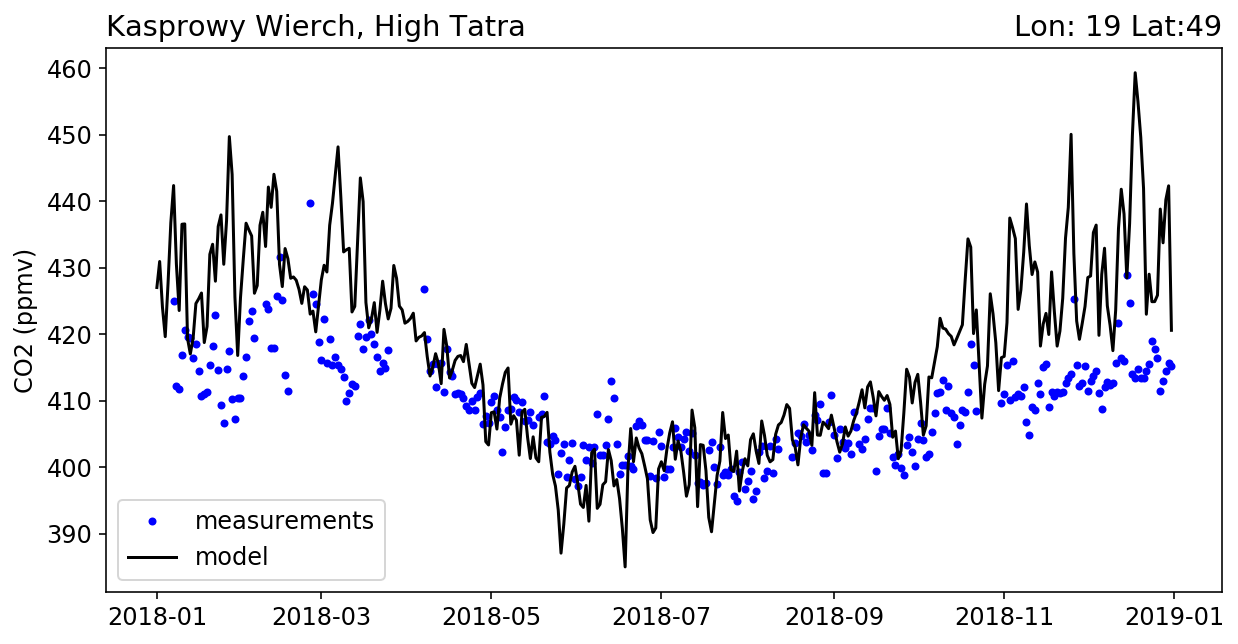

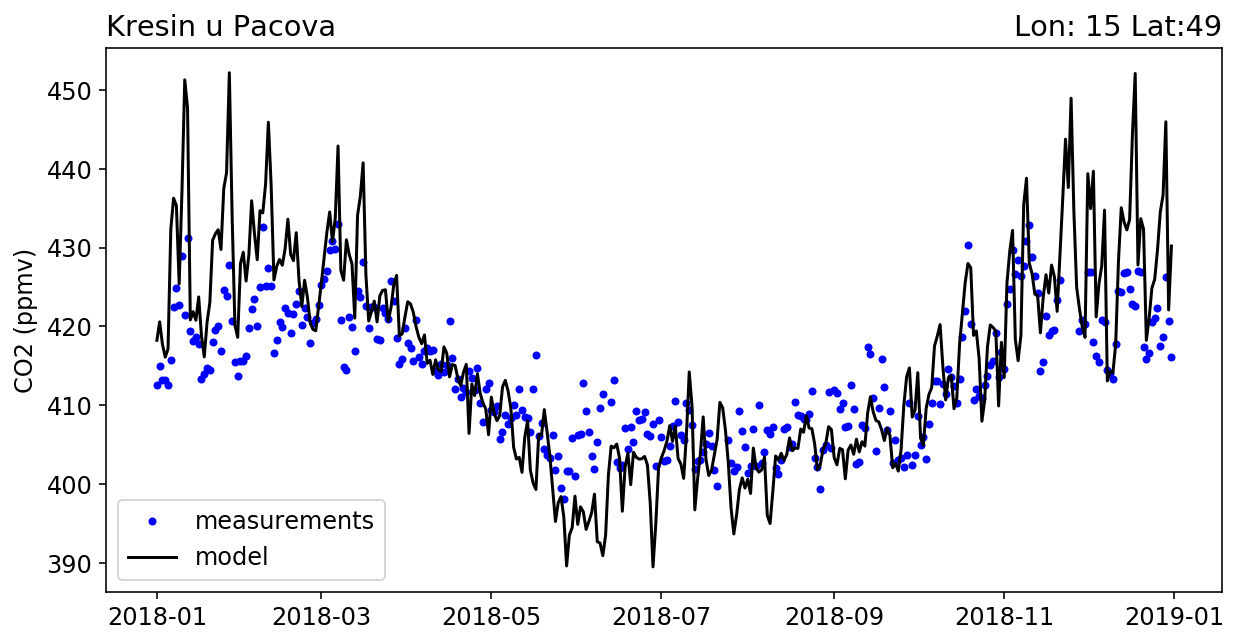

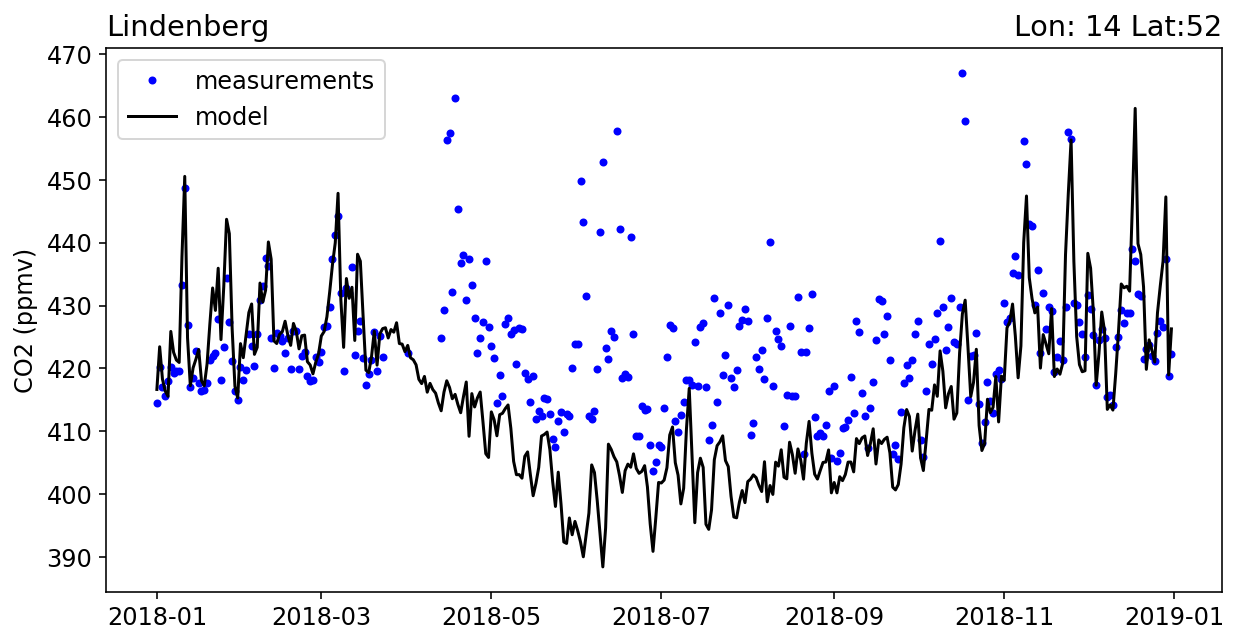

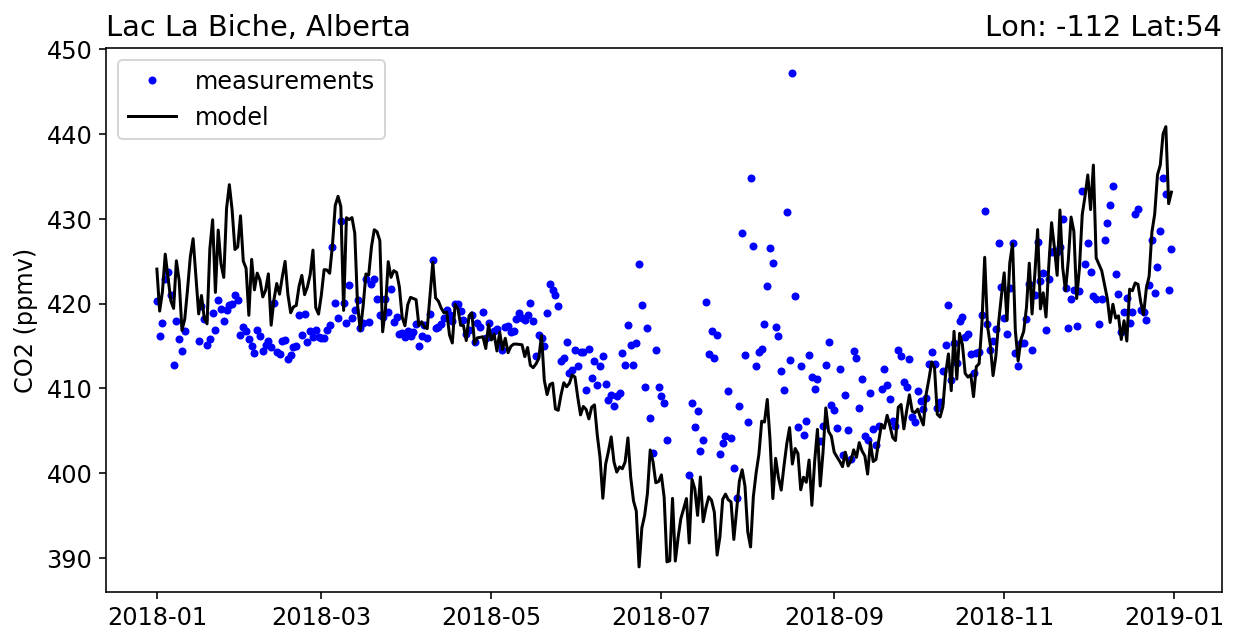

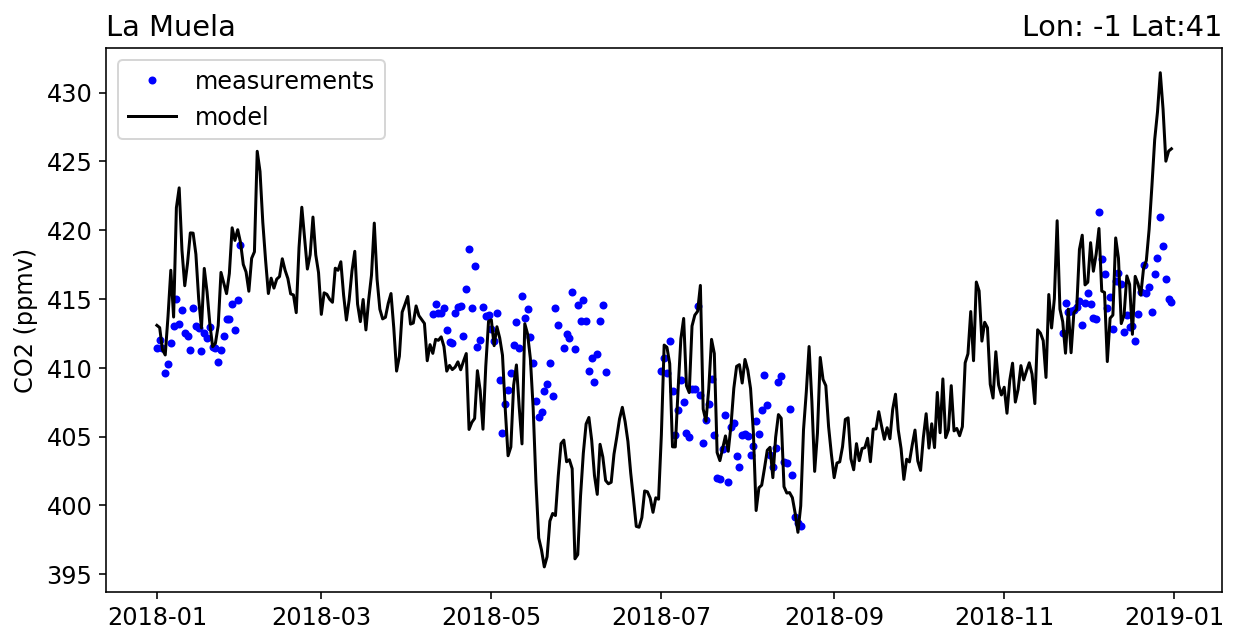

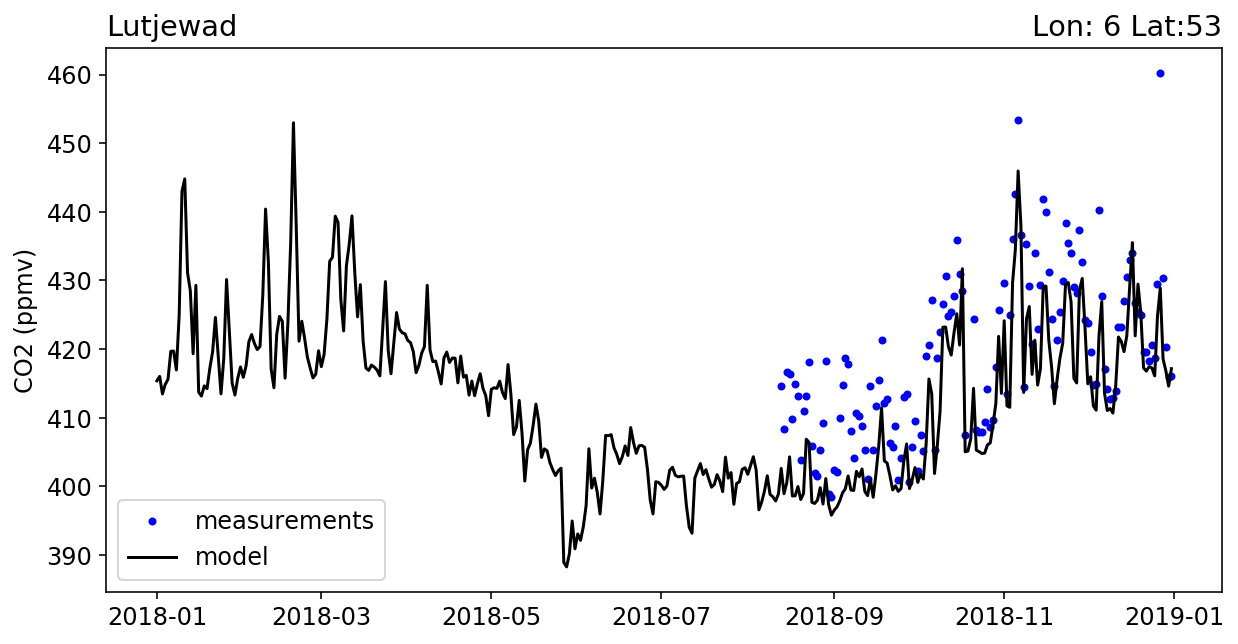

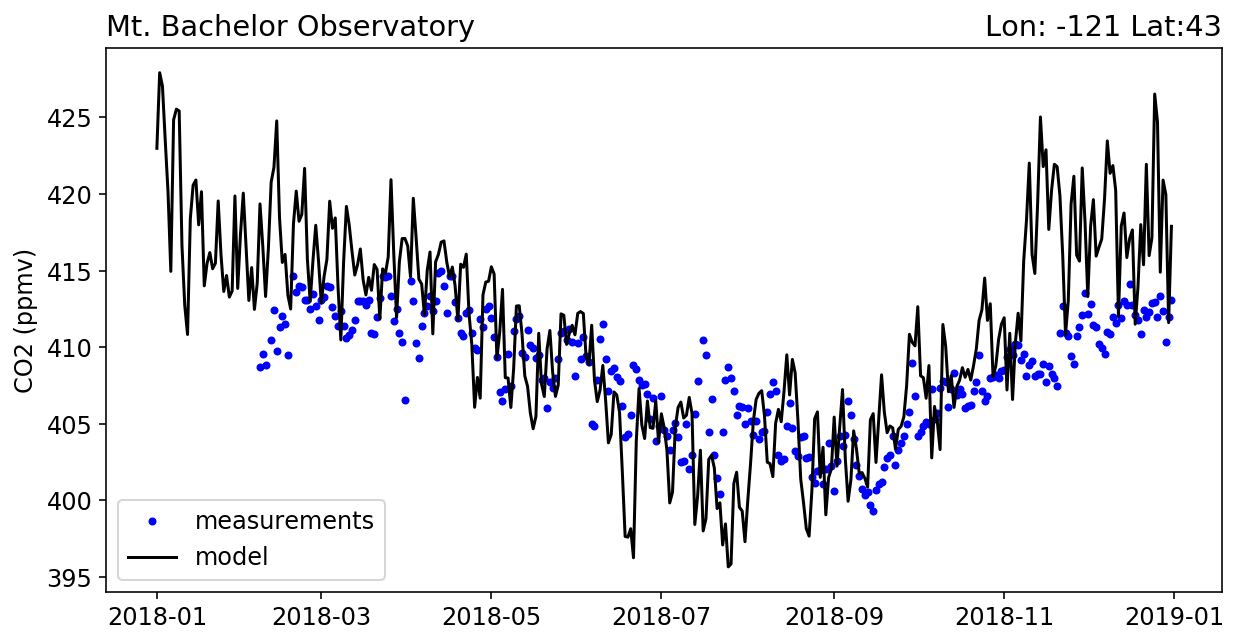

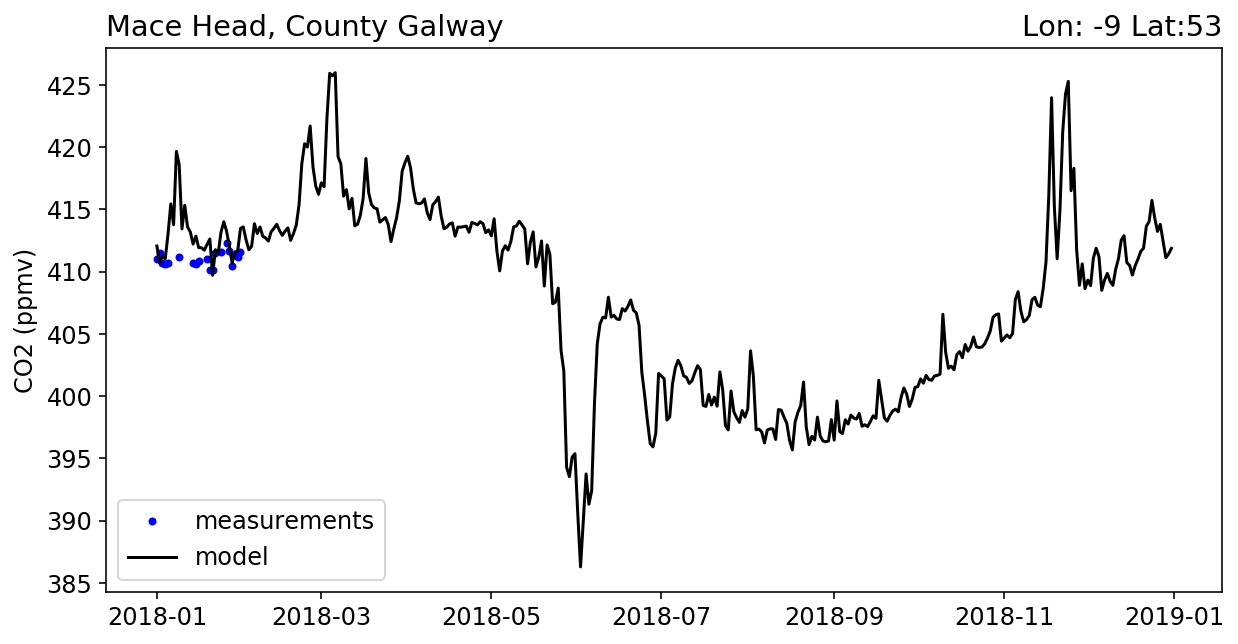

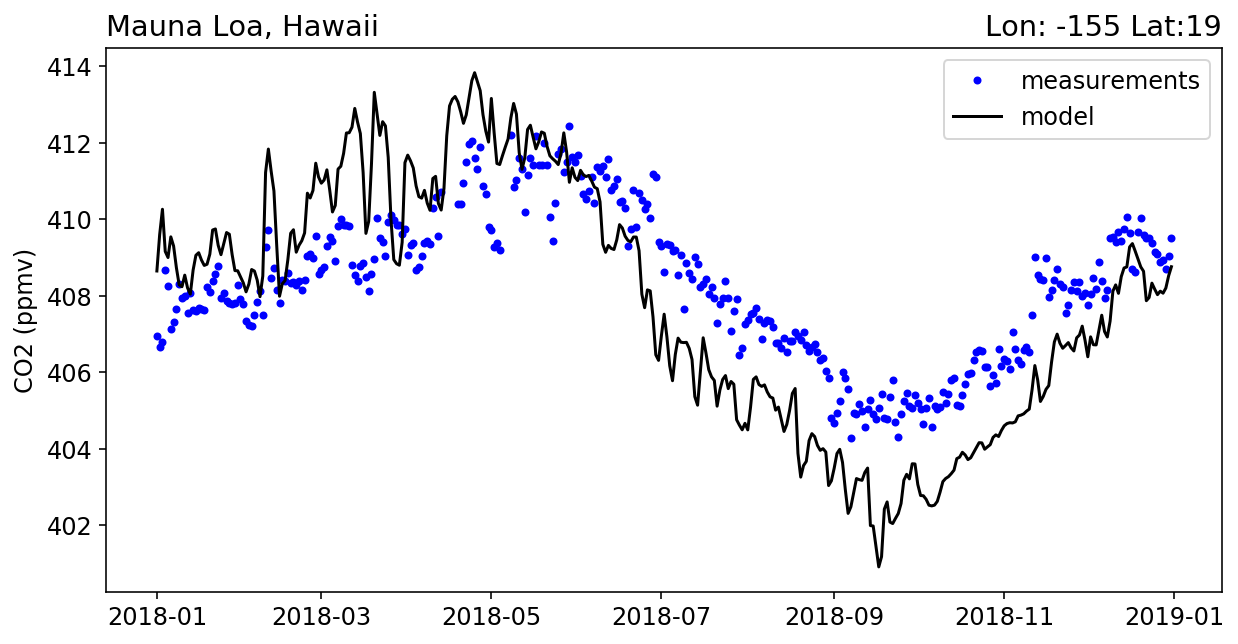

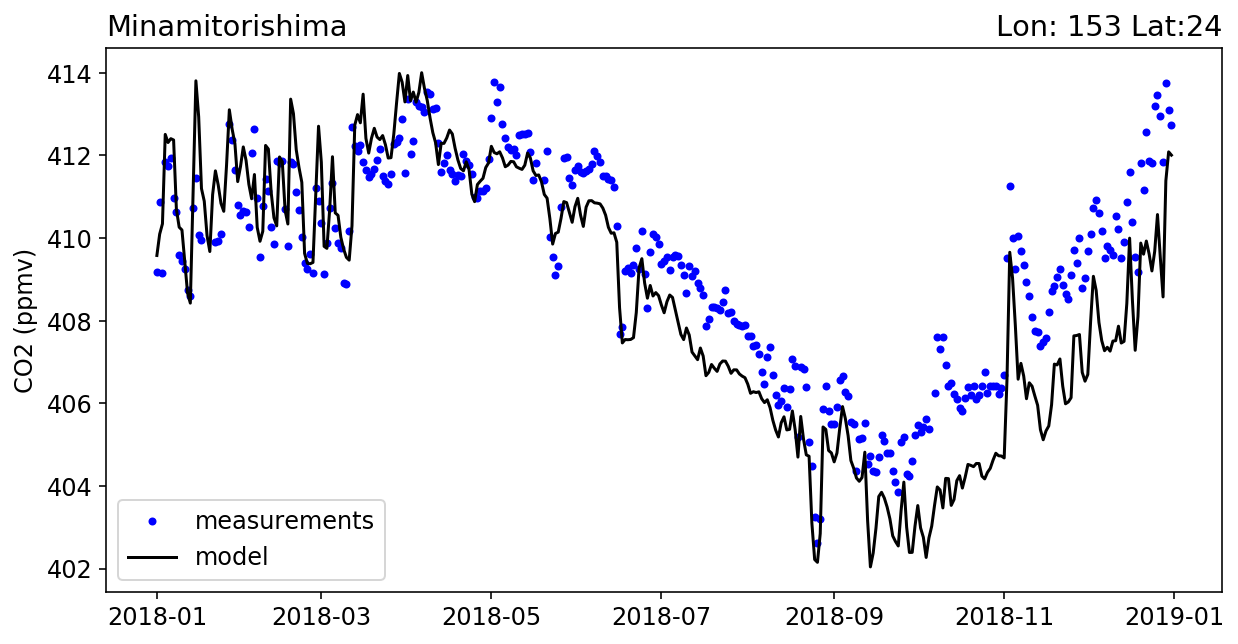

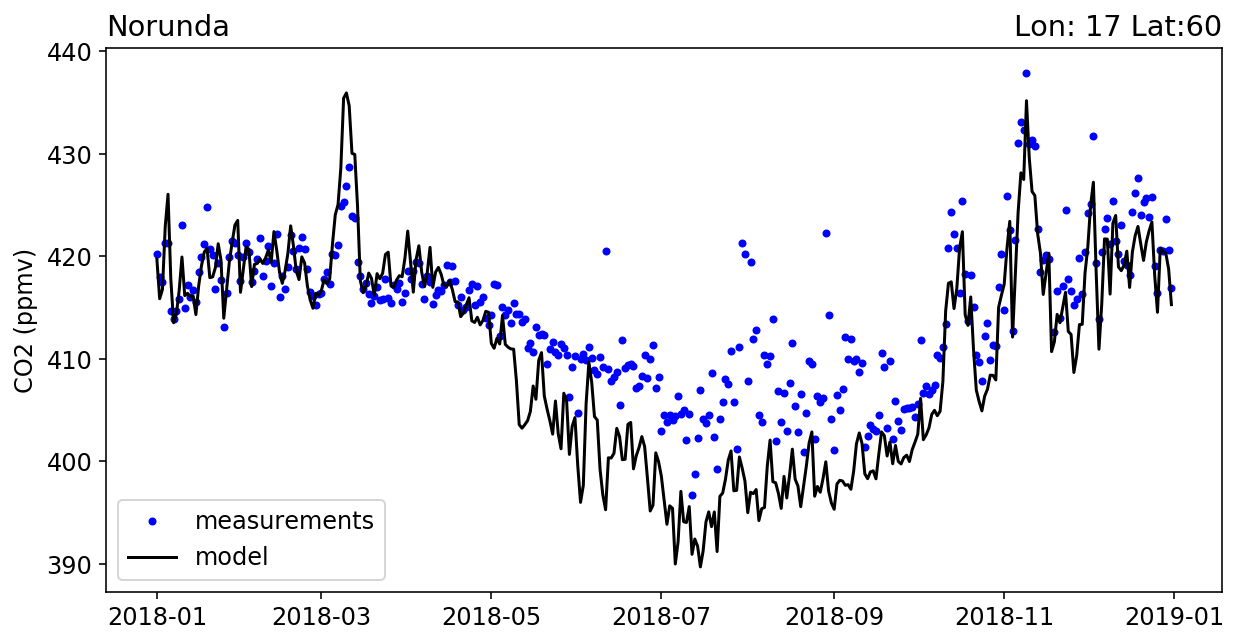

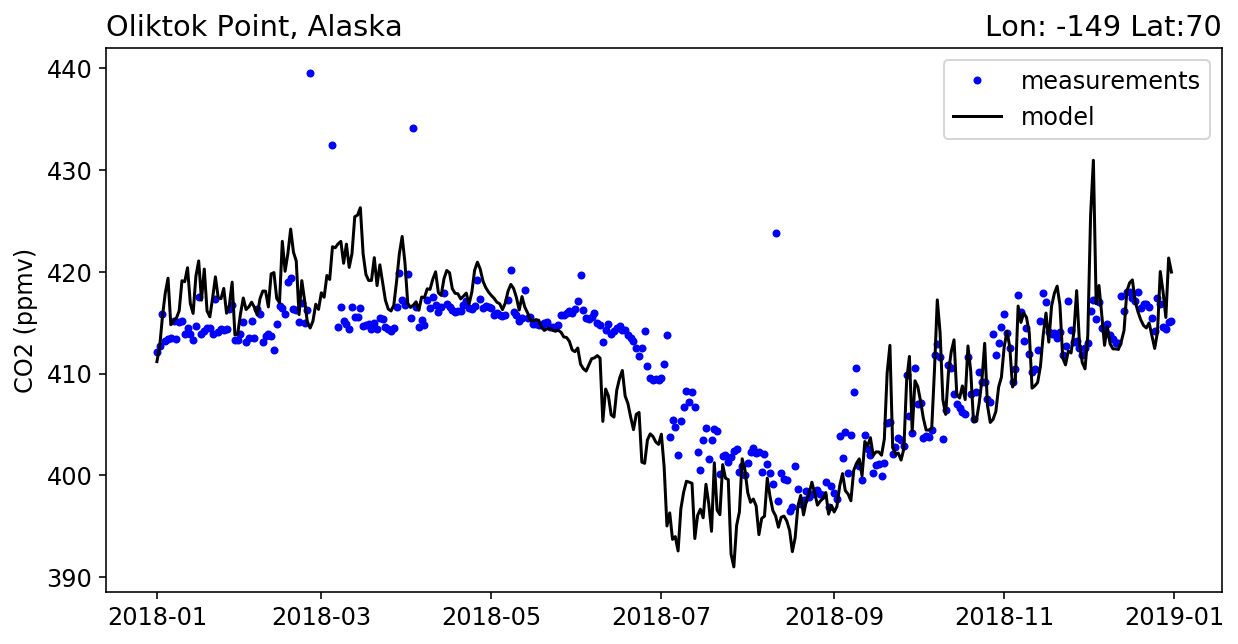

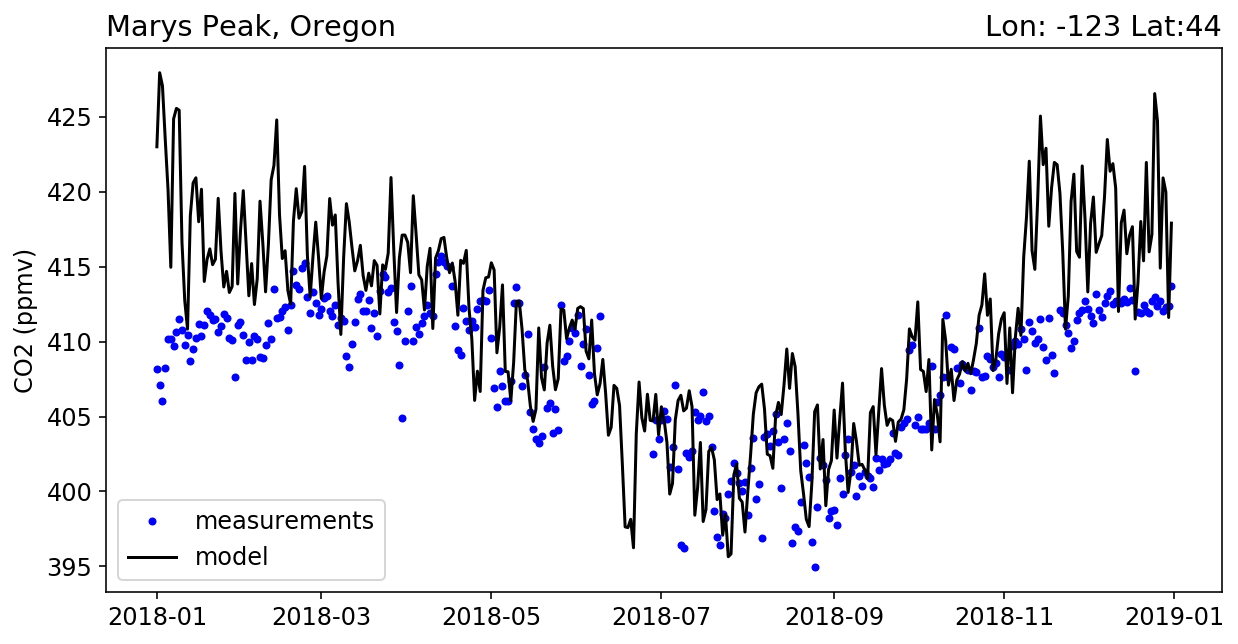

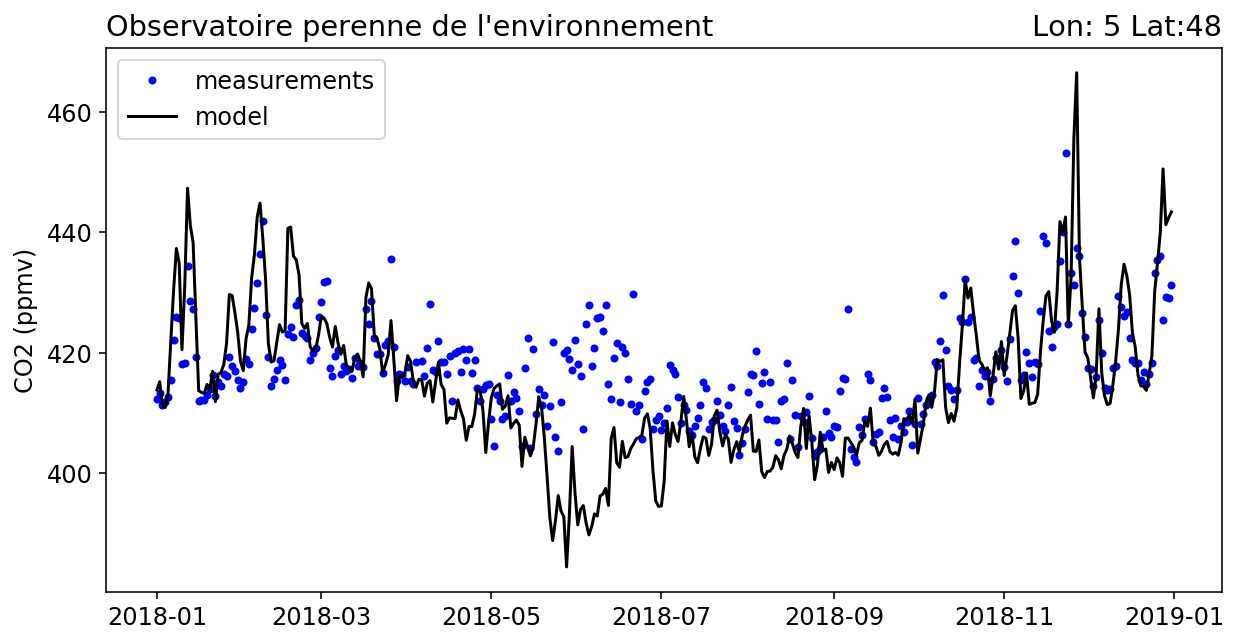

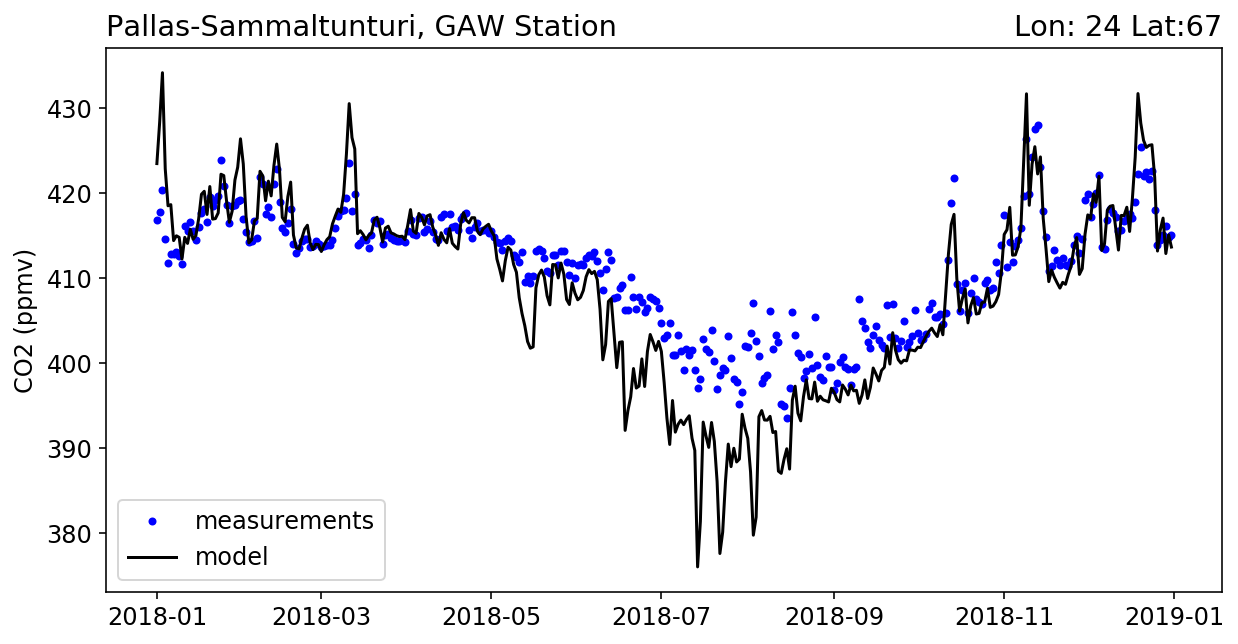

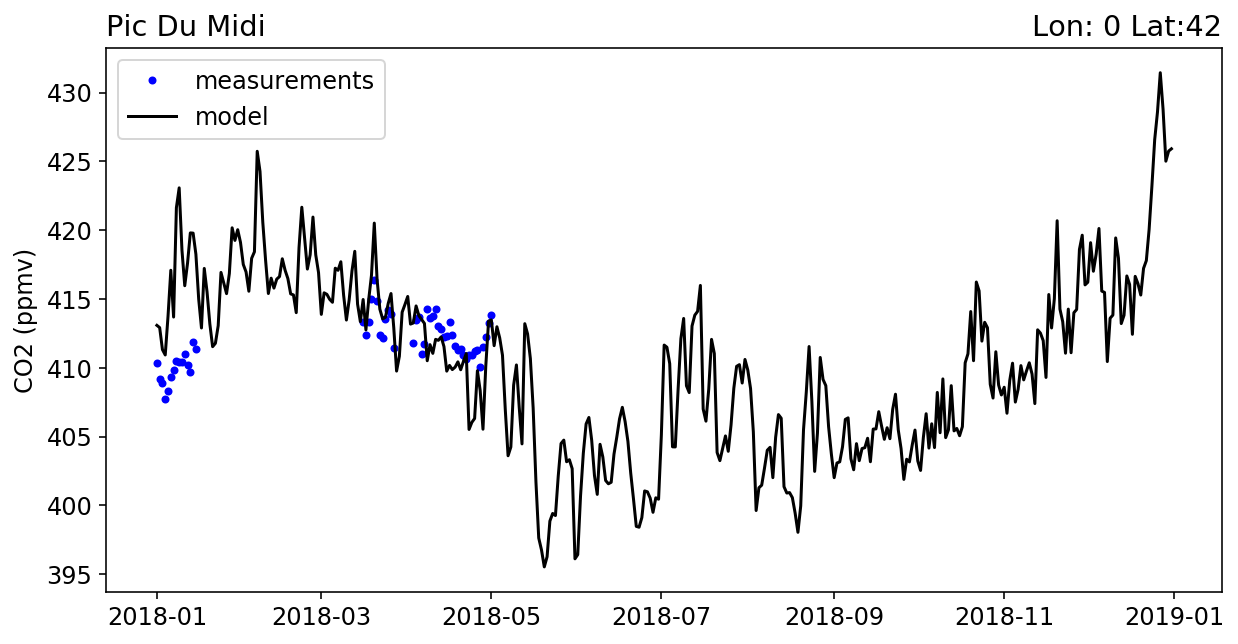

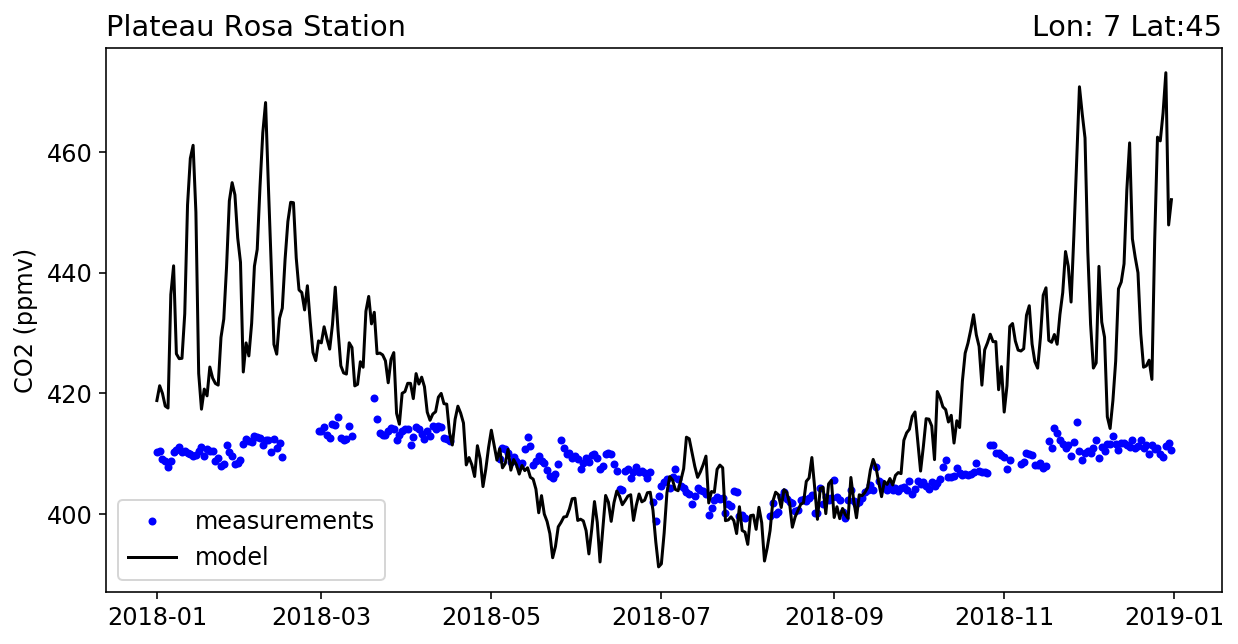

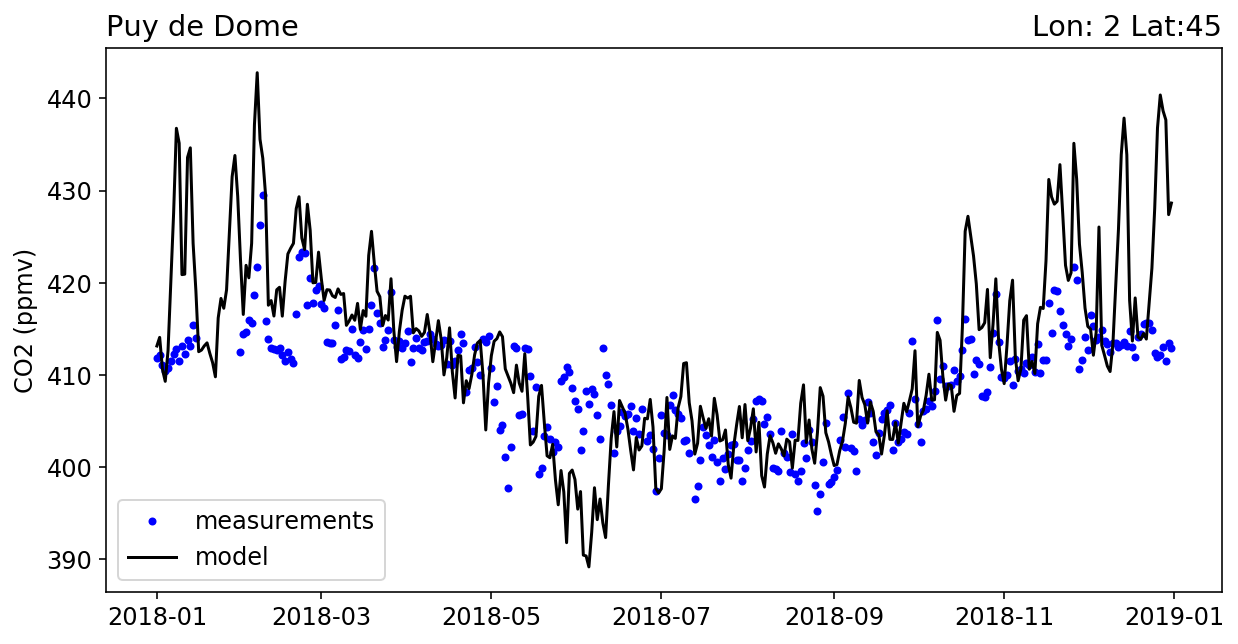

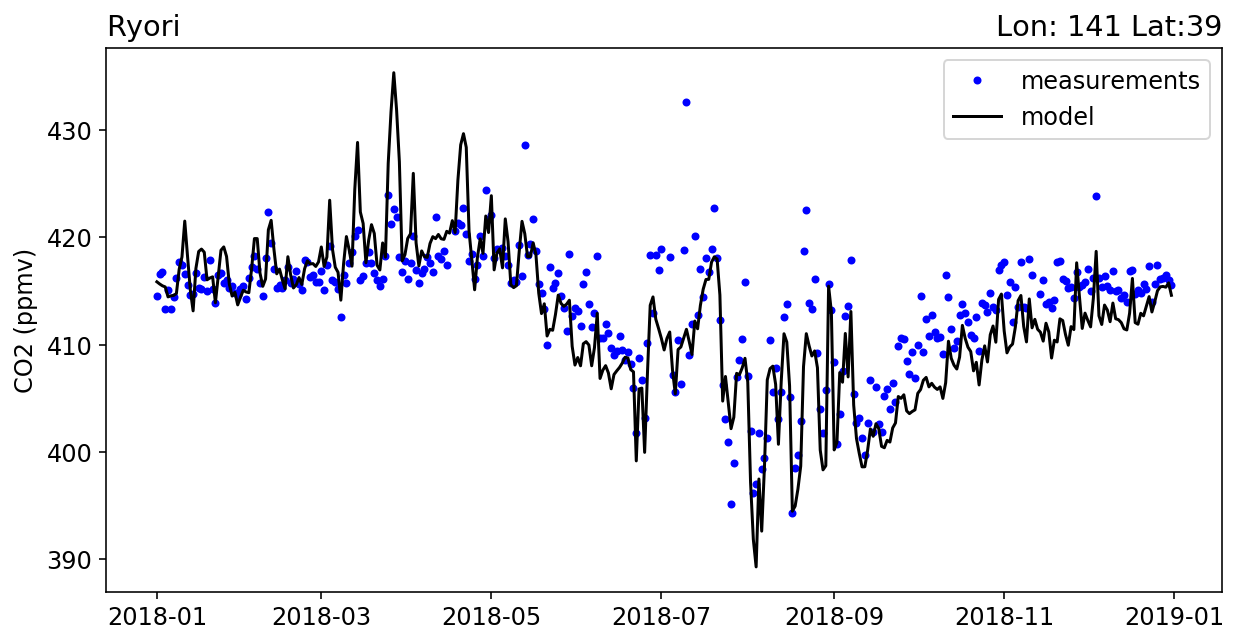

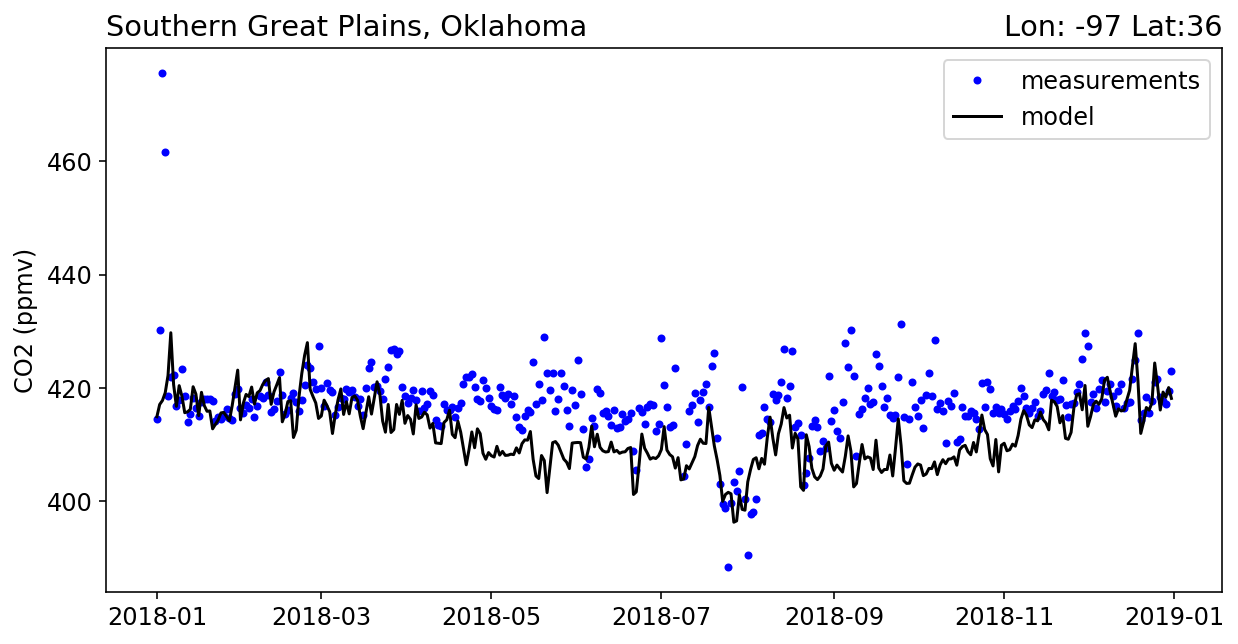

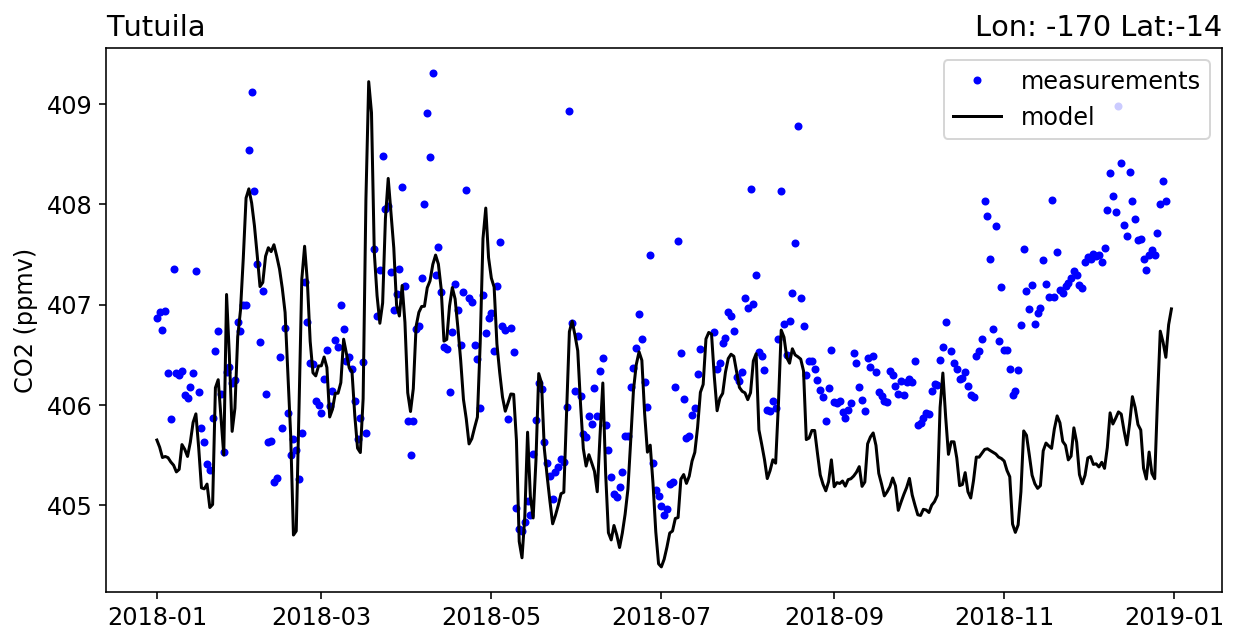

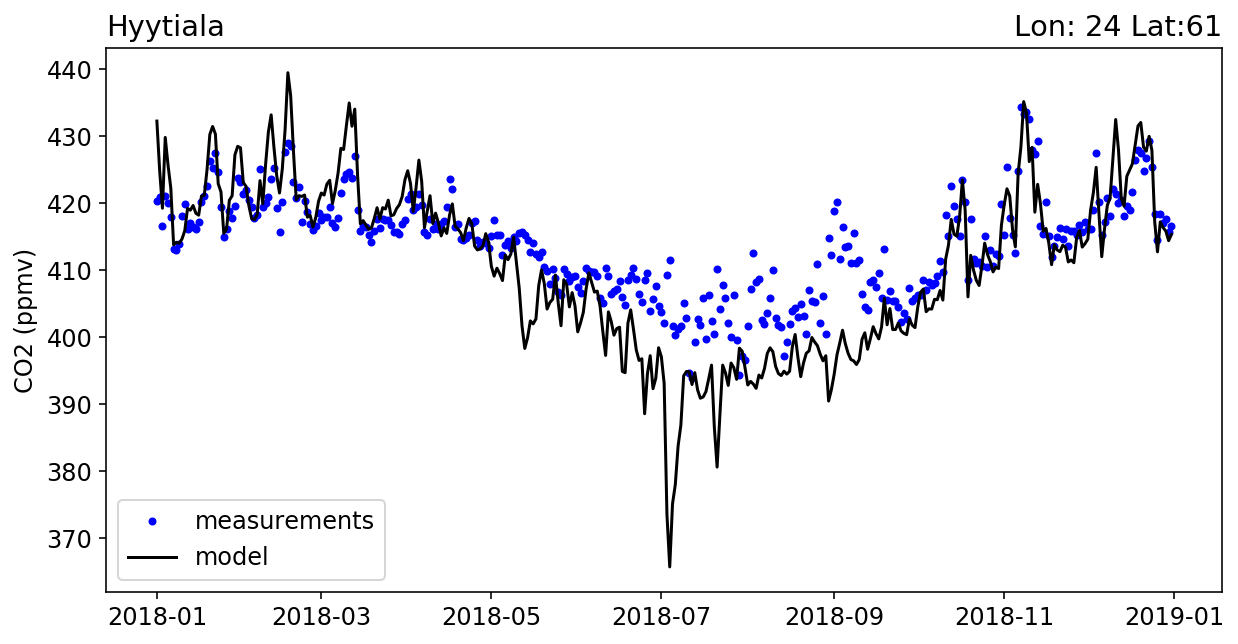

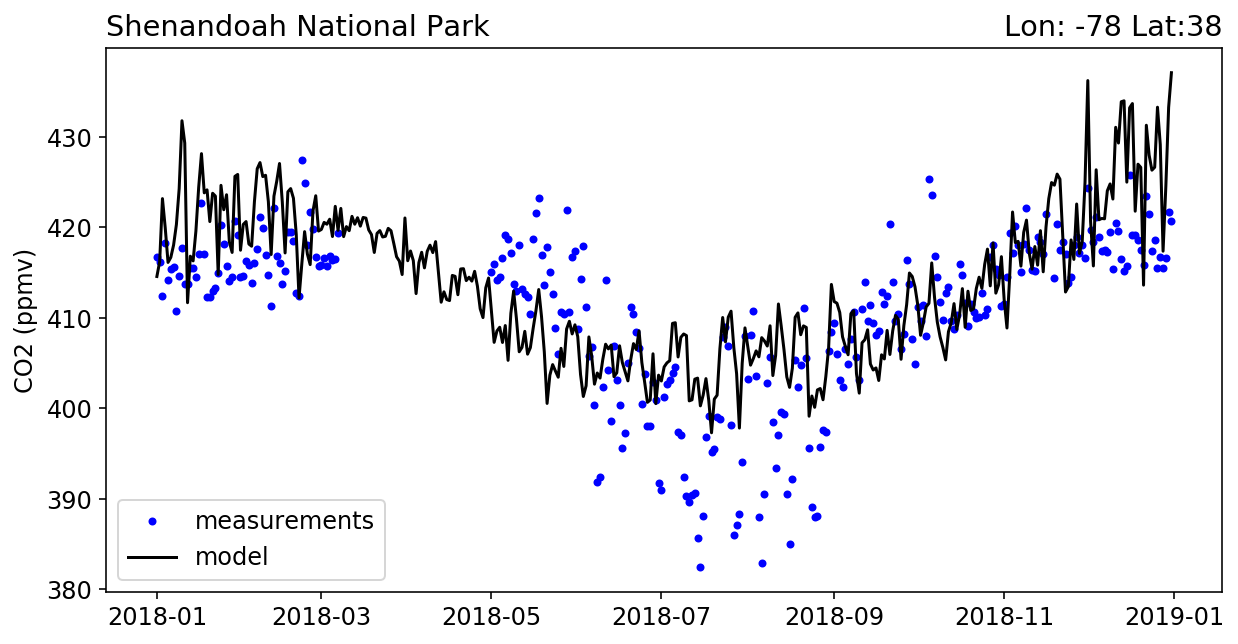

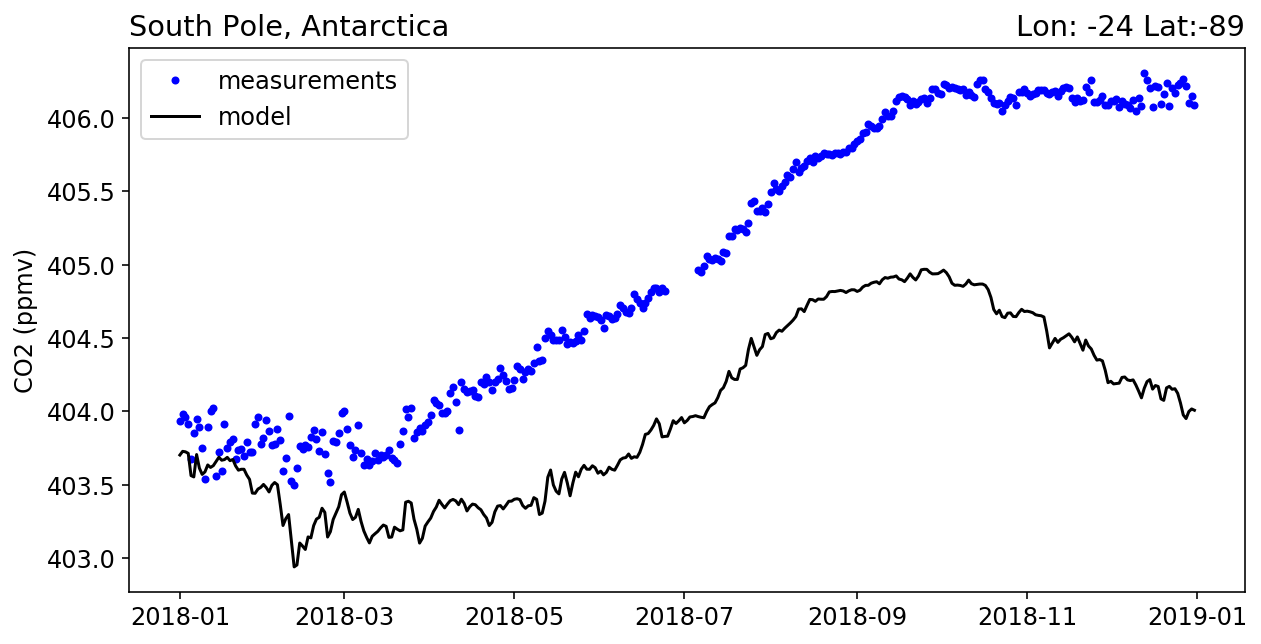

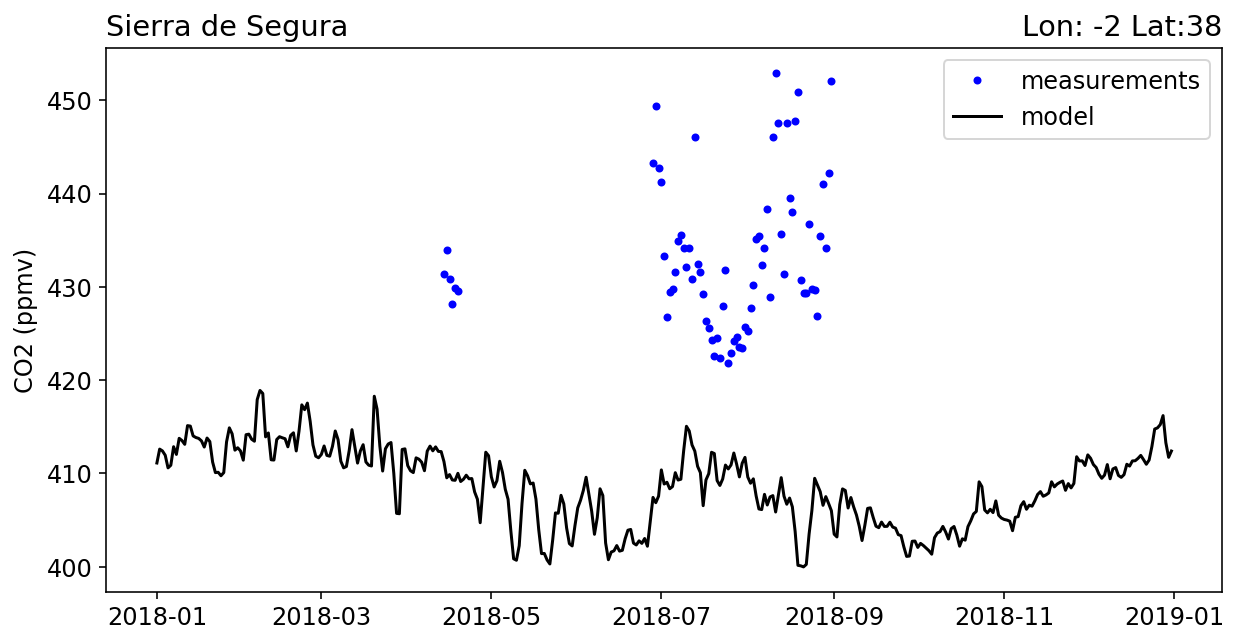

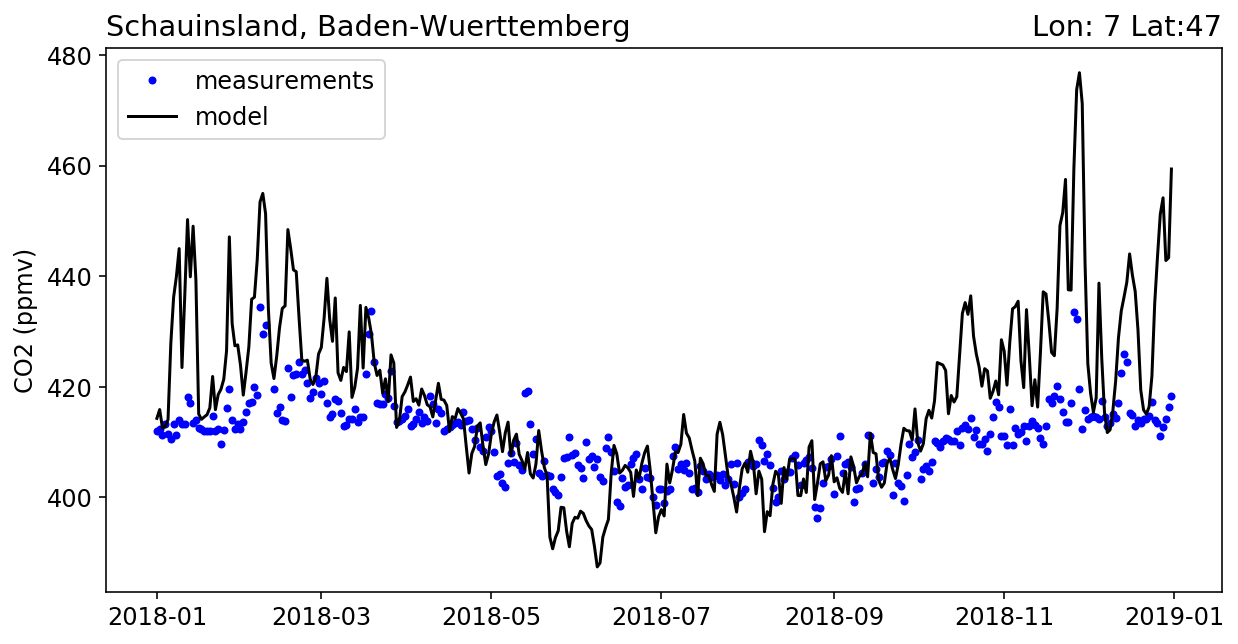

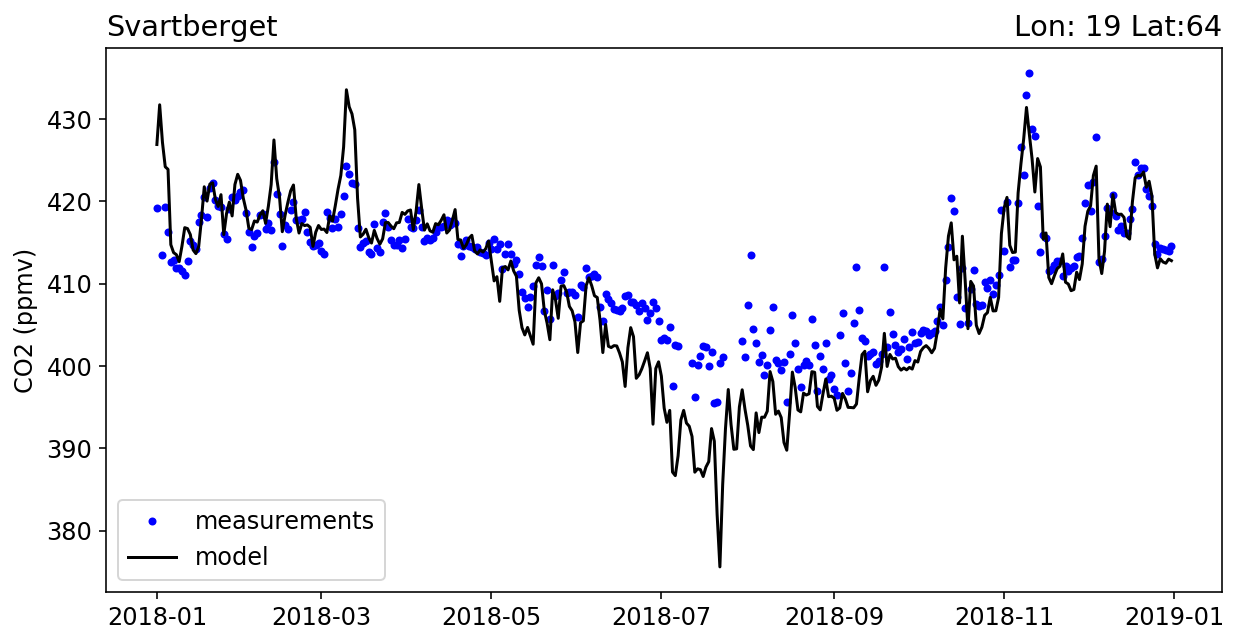

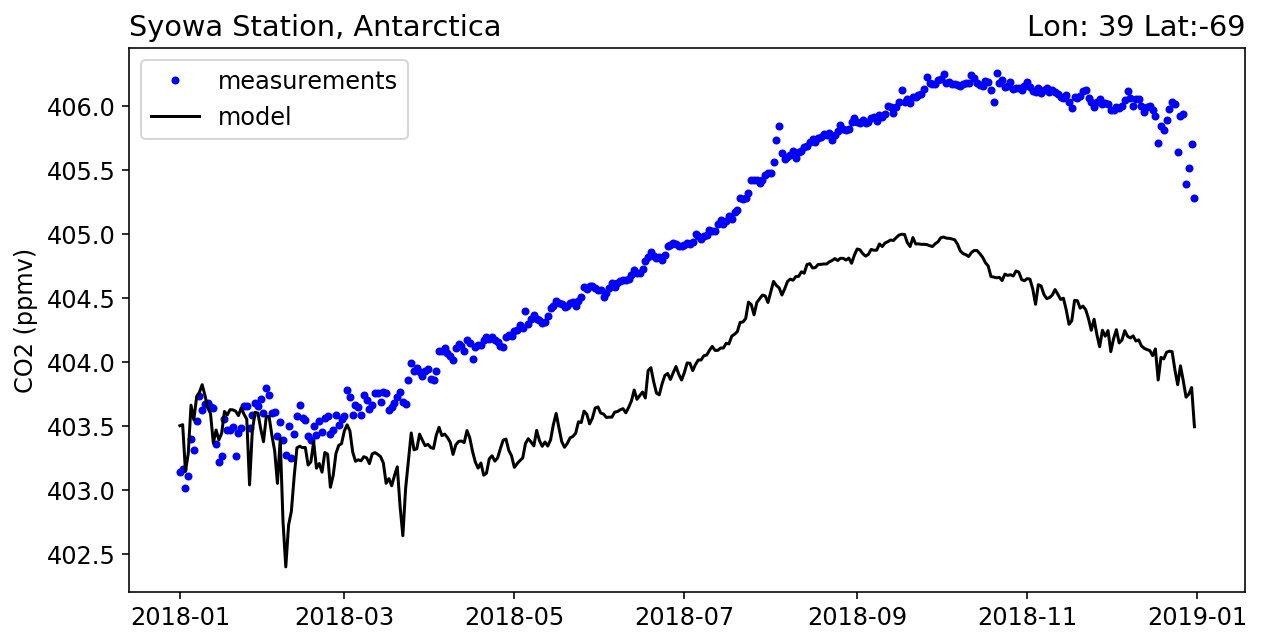

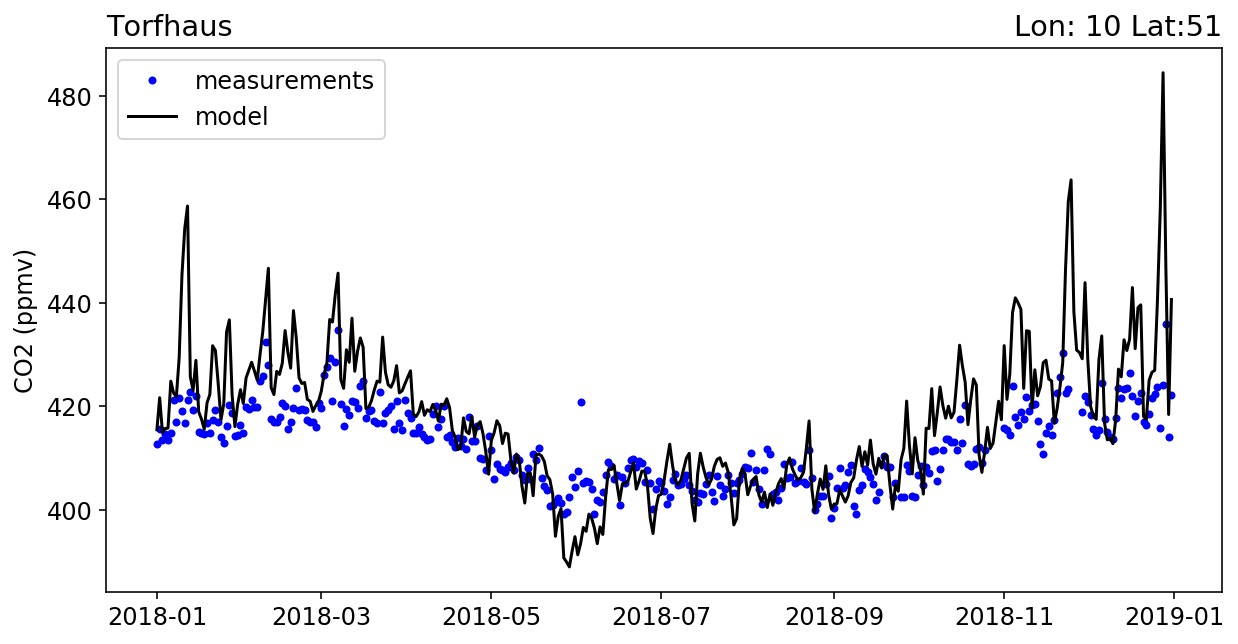

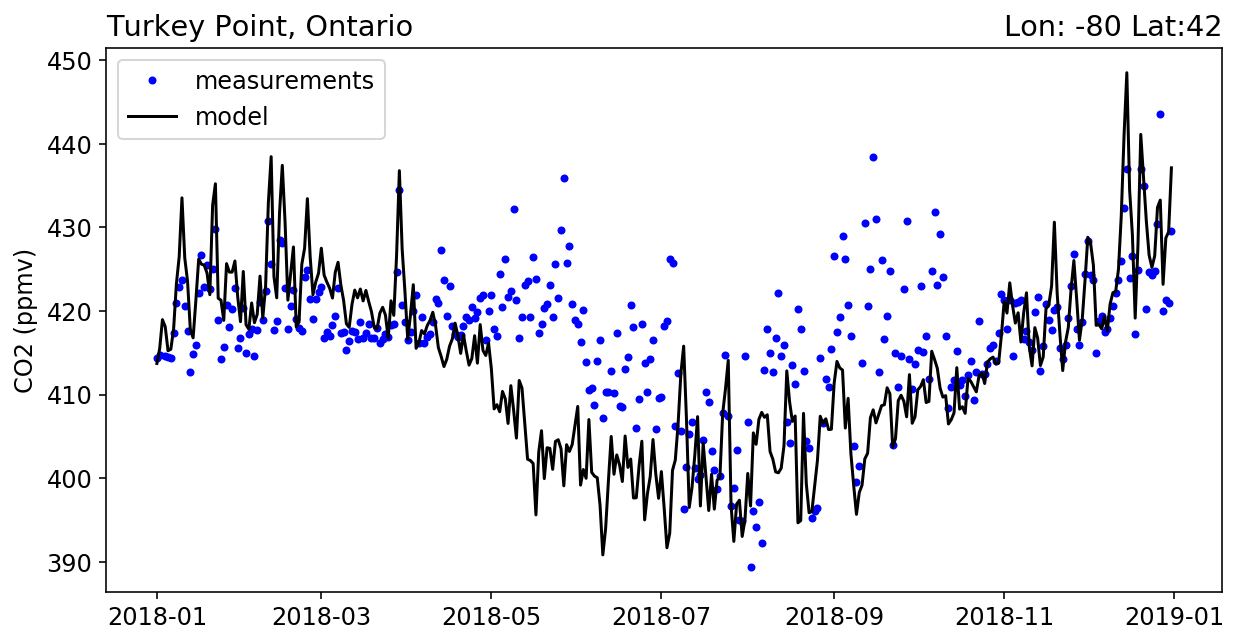

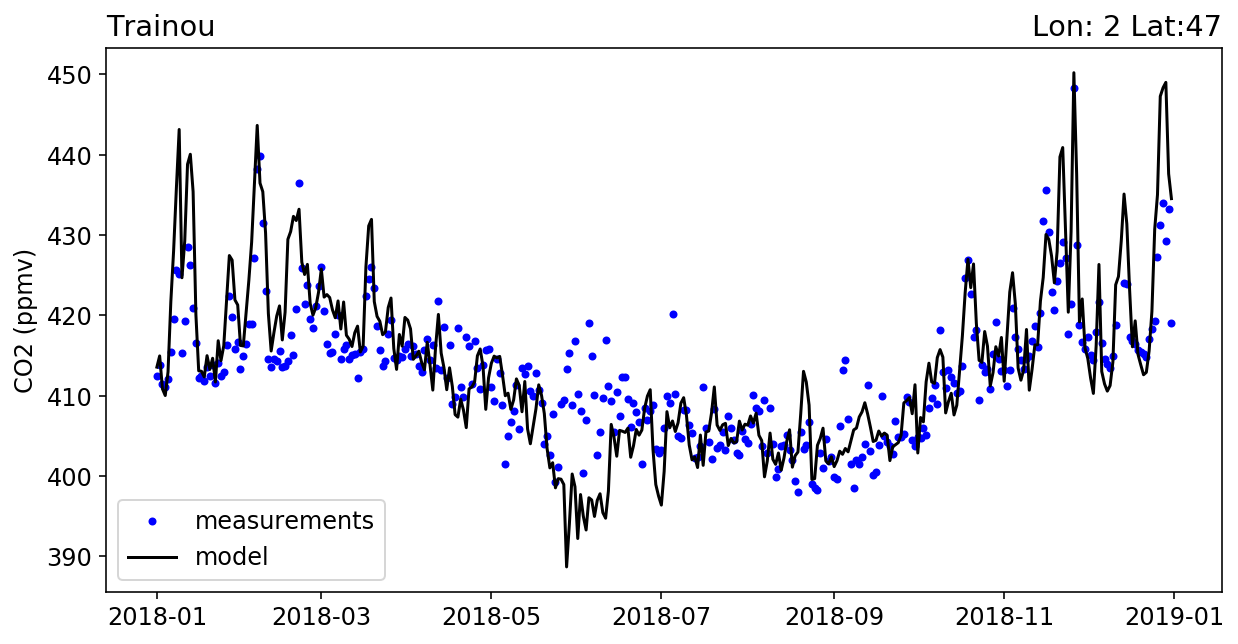

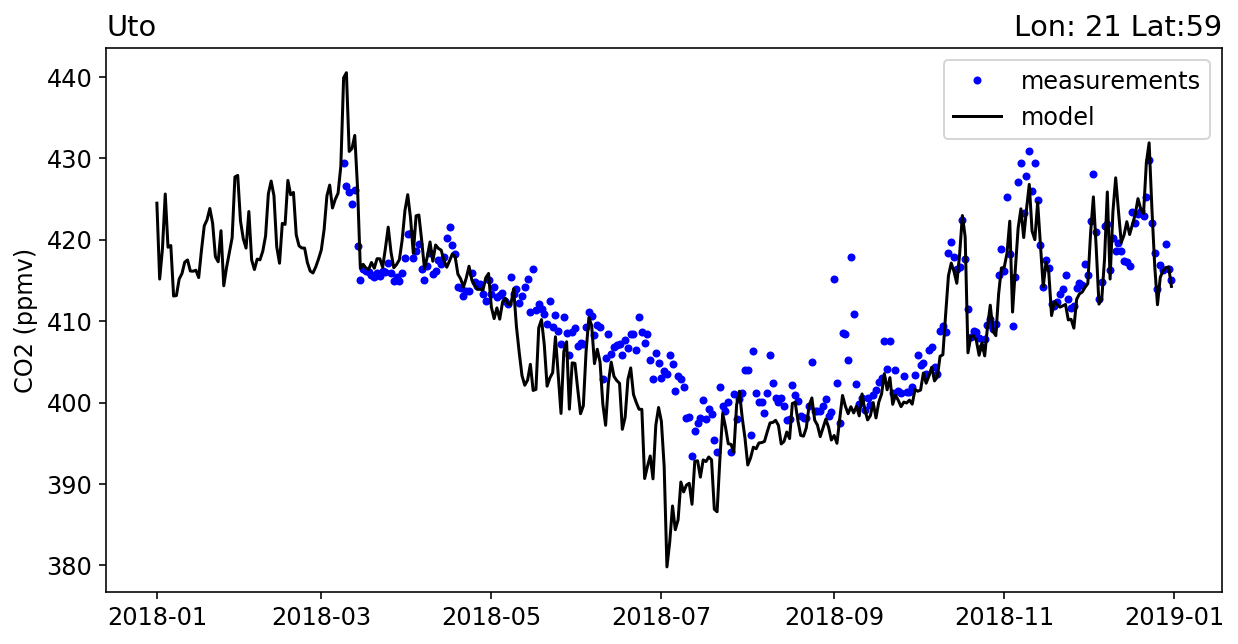

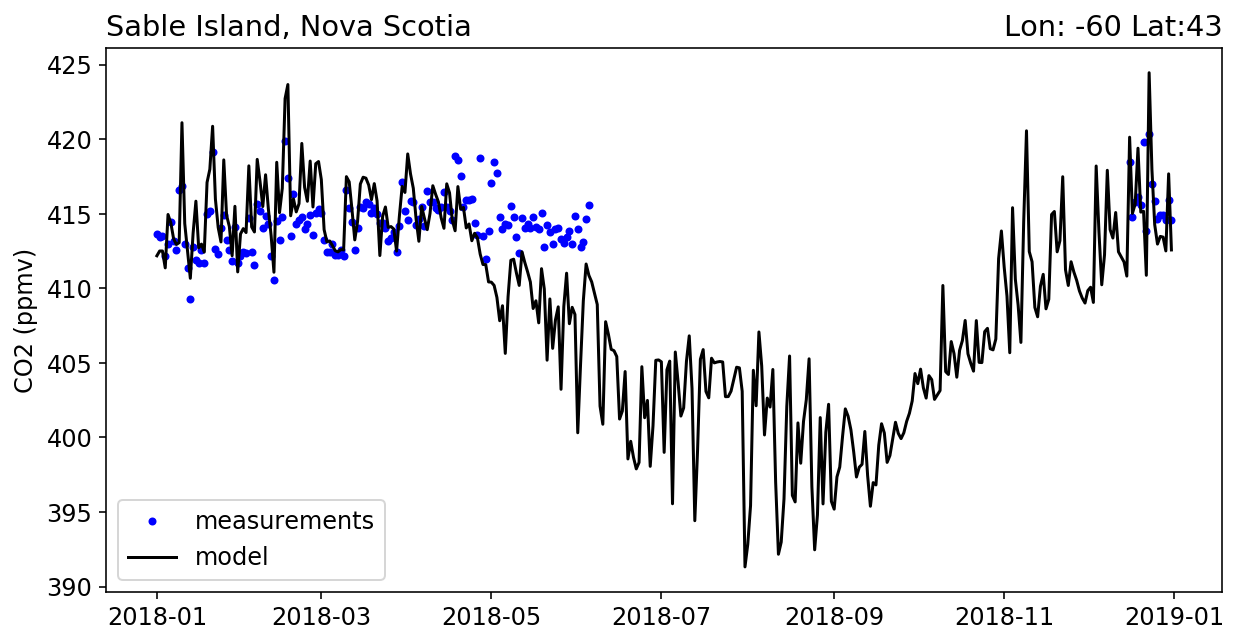

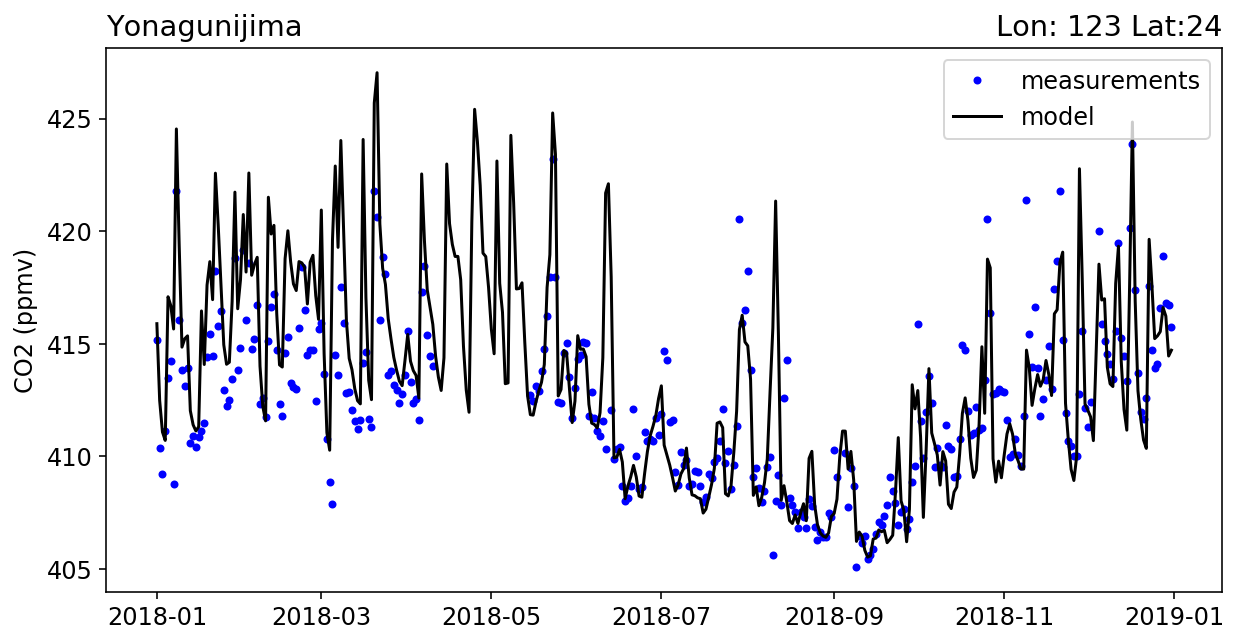

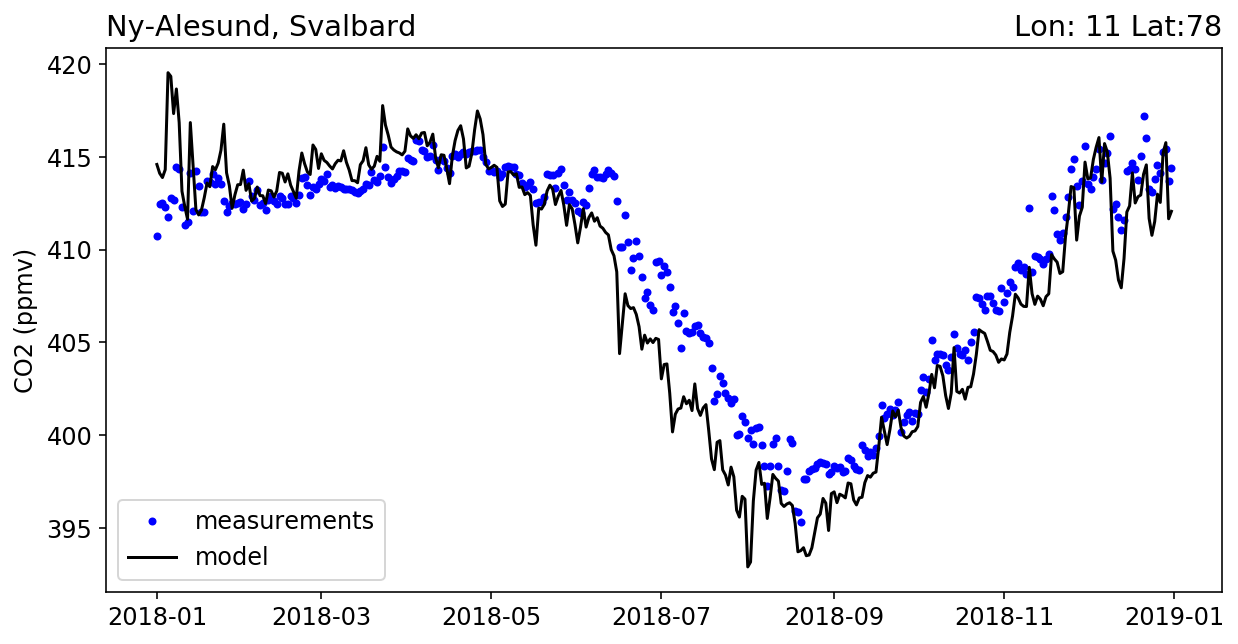

In [13]:
nm_loc = len(lines) # number of locations
for ifile in range(nm_loc):
    filename = lines[ifile].strip()
    ds_obs = xr.open_dataset(file_dir + filename)
    lon = ds_obs.attrs['site_longitude']
    lat = ds_obs.attrs['site_latitude']
    # extract the nearest grid point model output
    ts_model = daily_co2_mod.sel(lon = lon, lat = lat, method='nearest')*1e6
    
    ds_obs['obs'] = ds_obs['co2']
    ds_obs['mod'] = ds_obs['co2']
    ds_obs['mod'].values = ts_model.values
    
    obs_series = ds_obs['obs'].values
    model_series = ds_obs['mod'].values
    R = ma.corrcoef(ma.masked_invalid(obs_series), ma.masked_invalid(model_series))

    format_R = float("{0:.2f}".format(R[0,1]))
    print(format_R)

    fig = plt.figure(figsize=[10,5])
    plt.plot(ds_obs.date, ds_obs['obs'], 'b.', label = 'measurements')
    plt.plot(ds_obs.date, ds_obs['mod'], 'black', label = 'model')
    plt.legend()
    plt.title(ds_obs.attrs['site_name'], loc='left')
    plt.title('Lon: ' + str(int(lon)) + ' Lat:' + str(int(lat)), loc='right')
    plt.ylabel('CO2 (ppmv)')

    fig.savefig(file_dir + '/plots/' + str(year) + '_' + ds_obs.attrs['site_code'] + '_mod_vs_obs.png', dpi=300)
    